# Import Packages

In [1]:
import scipy.io.arff
from scipy.io.arff import loadarff
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import missingno as msno

# Load in arff files

In [2]:
def load_arff_file(filename):
    data, meta = scipy.io.arff.loadarff(filename)
    return data, meta

import_files = ['1year.arff','2year.arff','3year.arff',
                '4year.arff','5year.arff']

In [3]:
datasets = {}

for filename in import_files:
    data, meta = load_arff_file(filename)
    datasets[filename] = {'data':data,"meta":meta}

In [4]:
data_file1 = datasets['1year.arff']['data']
meta_file1 = datasets['1year.arff']['meta']

data_file2 = datasets['2year.arff']['data']
meta_file2 = datasets['2year.arff']['meta']

data_file3 = datasets['3year.arff']['data']
meta_file3 = datasets['3year.arff']['meta']

data_file4 = datasets['4year.arff']['data']
meta_file4 = datasets['4year.arff']['meta']

data_file5 = datasets['5year.arff']['data']
meta_file5 = datasets['5year.arff']['meta']

# print(data_file1)
# print(meta_file5)


# Combine files into Dataframe

In [5]:
# Create a list to store DataFrames
dfs = []

# Convert each numpy array to DataFrame, add a 'year' column, and store in the list
for filename in datasets:
    df = pd.DataFrame(datasets[filename]['data'])
    
    # Extract year information from the filename
    year = filename.split('year')[0]
    
    # Add a 'year' column to the DataFrame
    df['year'] = year
    
    dfs.append(df)

# Concatenate all the DataFrames
df = pd.concat(dfs, ignore_index=True)


In [6]:
for i in dfs:
    counting= i['year']
    print(counting[0])

1
2
3
4
5


Feature 21 and 37 tend to make up the most of our missing values within each year. 
These values tend to make up consistently over 50% missing for each year.

In [7]:
for df in dfs:
    year = df['year']
    miss_val_percentage = (df.isna().sum() / df.count()) * 100
    for col, percent in miss_val_percentage.items():
        if percent > 9:
            print(f"Column '{col} Year {year[0]}': {percent}% missing values")


Column 'Attr21 Year 1': 30.009250693802038% missing values
Column 'Attr37 Year 1': 63.91415908560765% missing values
Column 'Attr21 Year 2': 45.14196033670995% missing values
Column 'Attr37 Year 2': 79.89389920424404% missing values
Column 'Attr37 Year 3': 82.12242066932546% missing values
Column 'Attr37 Year 4': 83.02803738317756% missing values
Column 'Attr37 Year 5': 75.78822129684711% missing values


In [8]:
print((dfs[0].isna().sum() / dfs[0].count())*100)

Attr1     0.042711
Attr2     0.042711
Attr3     0.042711
Attr4     0.428755
Attr5     0.113976
            ...   
Attr62    0.000000
Attr63    0.428755
Attr64    0.486200
class     0.000000
year      0.000000
Length: 66, dtype: float64


# [Attribute Names](https://rpubs.com/gkuleck/931252)

# Data Inspection

In [9]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,b'0',5
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,b'0',5
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,b'0',5
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,b'0',5
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,b'0',5


In [10]:
df.shape

(5910, 66)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   5907 non-null   float64
 1   Attr2   5907 non-null   float64
 2   Attr3   5907 non-null   float64
 3   Attr4   5889 non-null   float64
 4   Attr5   5899 non-null   float64
 5   Attr6   5907 non-null   float64
 6   Attr7   5907 non-null   float64
 7   Attr8   5892 non-null   float64
 8   Attr9   5909 non-null   float64
 9   Attr10  5907 non-null   float64
 10  Attr11  5907 non-null   float64
 11  Attr12  5889 non-null   float64
 12  Attr13  5910 non-null   float64
 13  Attr14  5907 non-null   float64
 14  Attr15  5904 non-null   float64
 15  Attr16  5892 non-null   float64
 16  Attr17  5892 non-null   float64
 17  Attr18  5907 non-null   float64
 18  Attr19  5910 non-null   float64
 19  Attr20  5910 non-null   float64
 20  Attr21  5807 non-null   float64
 21  Attr22  5907 non-null   float64
 22  

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Attr1,5907.0,-0.022347,6.163655,-4.638900e+02,0.003965,0.04667,0.117050,87.459
Attr2,5907.0,0.465086,5.751283,-4.308700e+02,0.255355,0.45175,0.661635,72.416
Attr3,5907.0,0.189155,1.177729,-7.206700e+01,0.043953,0.21944,0.418430,28.336
Attr4,5889.0,4.892476,91.434574,-4.031100e-01,1.093700,1.65170,2.931000,6845.800
Attr5,5899.0,19.406758,21529.322027,-1.076400e+06,-43.836500,0.49149,48.765000,1250100.000
...,...,...,...,...,...,...,...,...
Attr60,5642.0,911.033757,64154.692377,-1.244000e+01,5.248500,9.03950,17.319500,4818700.000
Attr61,5895.0,10.941497,41.166591,-9.249300e-02,4.278650,6.19890,9.350900,1308.500
Attr62,5910.0,241.978184,6221.135690,-2.365300e+02,44.646750,73.77850,118.720000,451380.000
Attr63,5889.0,9.127741,103.074304,-1.543200e+00,3.066900,4.93000,8.115800,7641.300


# Missing Data Inspection

In [13]:
for i in df.columns:
    print(f"{i}", (df[i].isna().sum()/ df[i].count()) * 100)

Attr1 0.050787201625190445
Attr2 0.050787201625190445
Attr3 0.050787201625190445
Attr4 0.3565970453387672
Attr5 0.18647228343787084
Attr6 0.050787201625190445
Attr7 0.050787201625190445
Attr8 0.30549898167006106
Attr9 0.016923337282112032
Attr10 0.050787201625190445
Attr11 0.050787201625190445
Attr12 0.3565970453387672
Attr13 0.0
Attr14 0.050787201625190445
Attr15 0.10162601626016261
Attr16 0.30549898167006106
Attr17 0.30549898167006106
Attr18 0.050787201625190445
Attr19 0.0
Attr20 0.0
Attr21 1.7737213707594284
Attr22 0.050787201625190445
Attr23 0.0
Attr24 2.3376623376623376
Attr25 0.050787201625190445
Attr26 0.30549898167006106
Attr27 7.084616778401884
Attr28 1.8438738583491296
Attr29 0.050787201625190445
Attr30 0.0
Attr31 0.0
Attr32 0.7844474761255117
Attr33 0.3565970453387672
Attr34 0.30549898167006106
Attr35 0.050787201625190445
Attr36 0.050787201625190445
Attr37 75.78822129684711
Attr38 0.050787201625190445
Attr39 0.0
Attr40 0.3565970453387672
Attr41 1.4418125643666324
Attr42 0.0


In [14]:
# print missing data greater than 1 % 
for i in df.columns:
    if ((df[i].isna().sum() / df[i].count()) * 100) > 1:
        print(f"{i}", (df[i].isna().sum()/ df[i].count()) * 100)

Attr21 1.7737213707594284
Attr24 2.3376623376623376
Attr27 7.084616778401884
Attr28 1.8438738583491296
Attr37 75.78822129684711
Attr41 1.4418125643666324
Attr45 4.750088621056363
Attr53 1.8438738583491296
Attr54 1.8438738583491296
Attr60 4.750088621056363
Attr64 1.8438738583491296


## Missing Data Heatmap

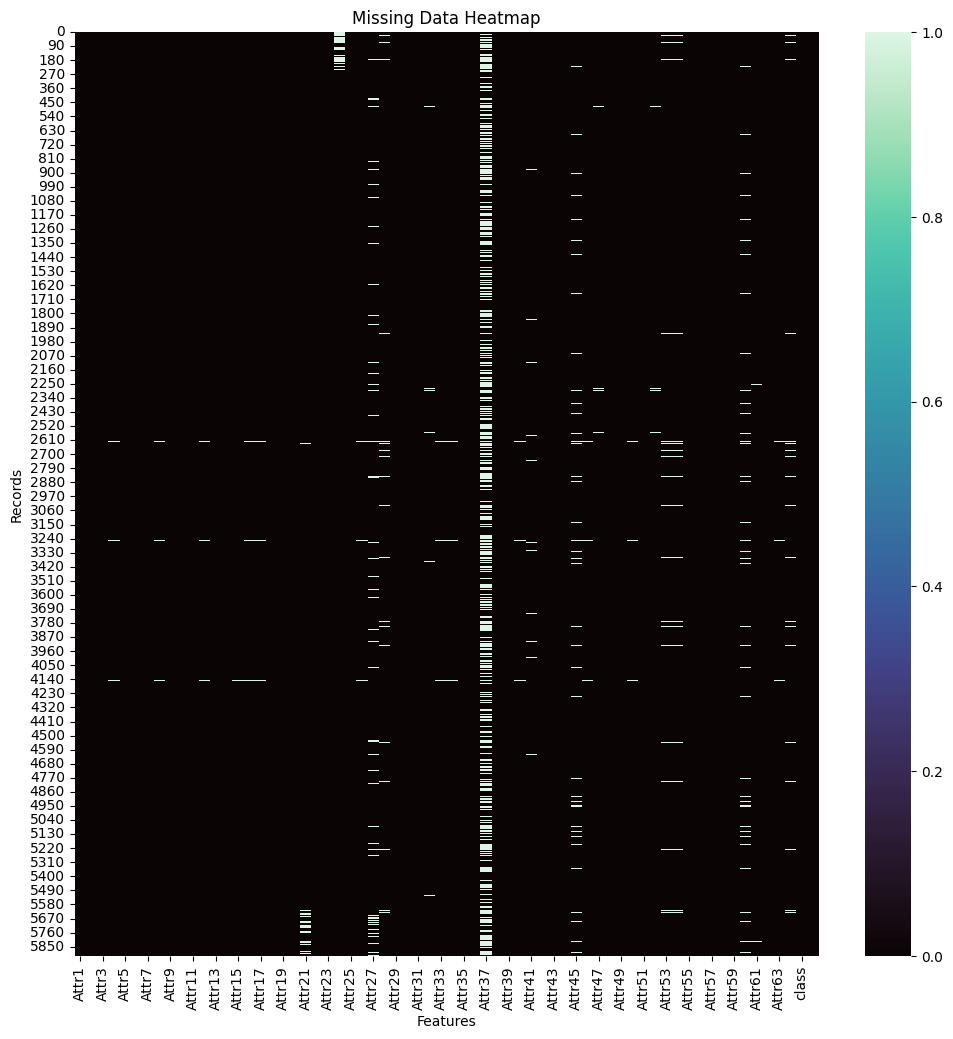

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df.isna(),cmap = "mako", cbar=True)
plt.title('Missing Data Heatmap')
plt.xlabel('Features')  # Title for the x-axis
plt.ylabel('Records')   # Title for the y-axis
plt.show()


In [16]:
df.drop(['Attr21','Attr37'], inplace = True, axis = 1)

In [17]:
for i in df:
    missing_val = (df[i].isna().sum() / df[i].count()) *100
    if missing_val > 0:
        print(f"{i}",missing_val)

Attr1 0.050787201625190445
Attr2 0.050787201625190445
Attr3 0.050787201625190445
Attr4 0.3565970453387672
Attr5 0.18647228343787084
Attr6 0.050787201625190445
Attr7 0.050787201625190445
Attr8 0.30549898167006106
Attr9 0.016923337282112032
Attr10 0.050787201625190445
Attr11 0.050787201625190445
Attr12 0.3565970453387672
Attr14 0.050787201625190445
Attr15 0.10162601626016261
Attr16 0.30549898167006106
Attr17 0.30549898167006106
Attr18 0.050787201625190445
Attr22 0.050787201625190445
Attr24 2.3376623376623376
Attr25 0.050787201625190445
Attr26 0.30549898167006106
Attr27 7.084616778401884
Attr28 1.8438738583491296
Attr29 0.050787201625190445
Attr32 0.7844474761255117
Attr33 0.3565970453387672
Attr34 0.30549898167006106
Attr35 0.050787201625190445
Attr36 0.050787201625190445
Attr38 0.050787201625190445
Attr40 0.3565970453387672
Attr41 1.4418125643666324
Attr45 4.750088621056363
Attr46 0.3565970453387672
Attr47 0.5957446808510638
Attr48 0.050787201625190445
Attr50 0.30549898167006106
Attr51 

In [18]:
for i in df:
    missing_val = (df[i].isna().sum() / df[i].count()) *100
    if missing_val > 1:
        print(f"{i}",missing_val)

Attr24 2.3376623376623376
Attr27 7.084616778401884
Attr28 1.8438738583491296
Attr41 1.4418125643666324
Attr45 4.750088621056363
Attr53 1.8438738583491296
Attr54 1.8438738583491296
Attr60 4.750088621056363
Attr64 1.8438738583491296


In [19]:
def convert_class_label(datalist):
    for i in range(len(datalist)):
        col = getattr(datalist[i],'class')
        datalist[i]['class'] = col.astype(int)

convert_class_label(dfs)

## Missing Data Sparsity Matrix

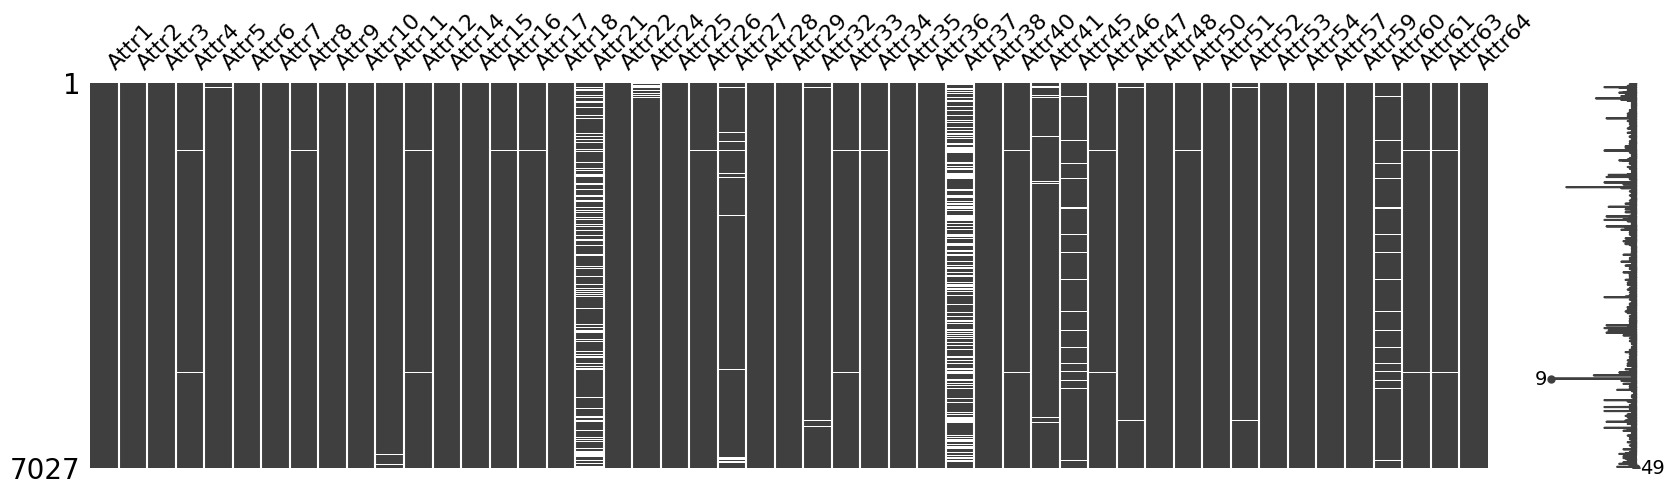

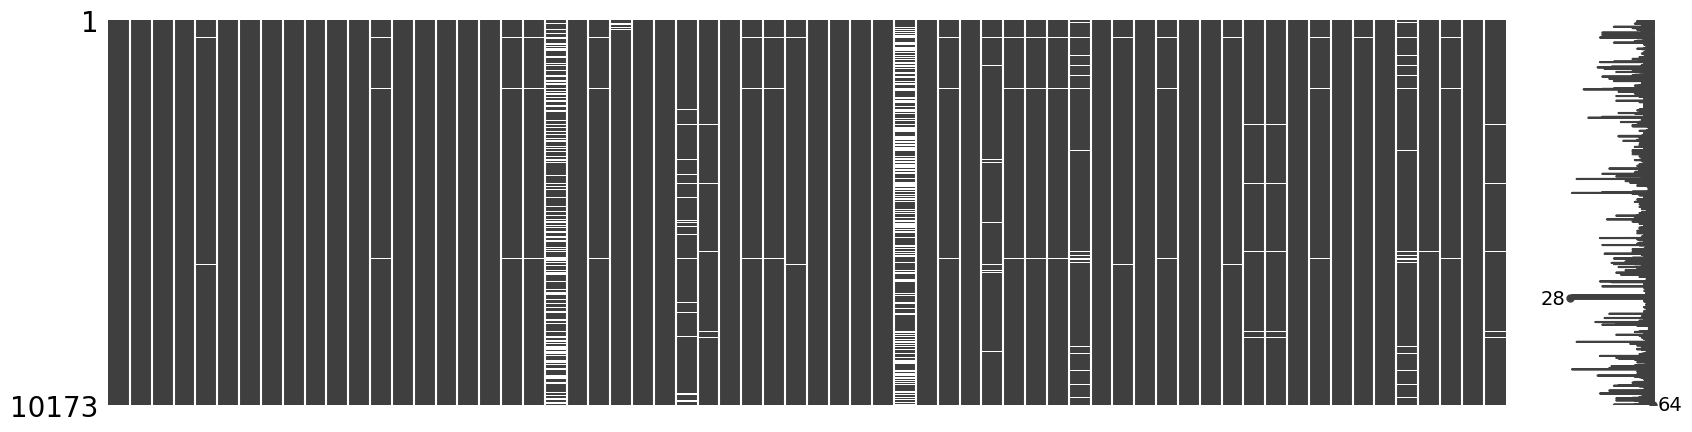

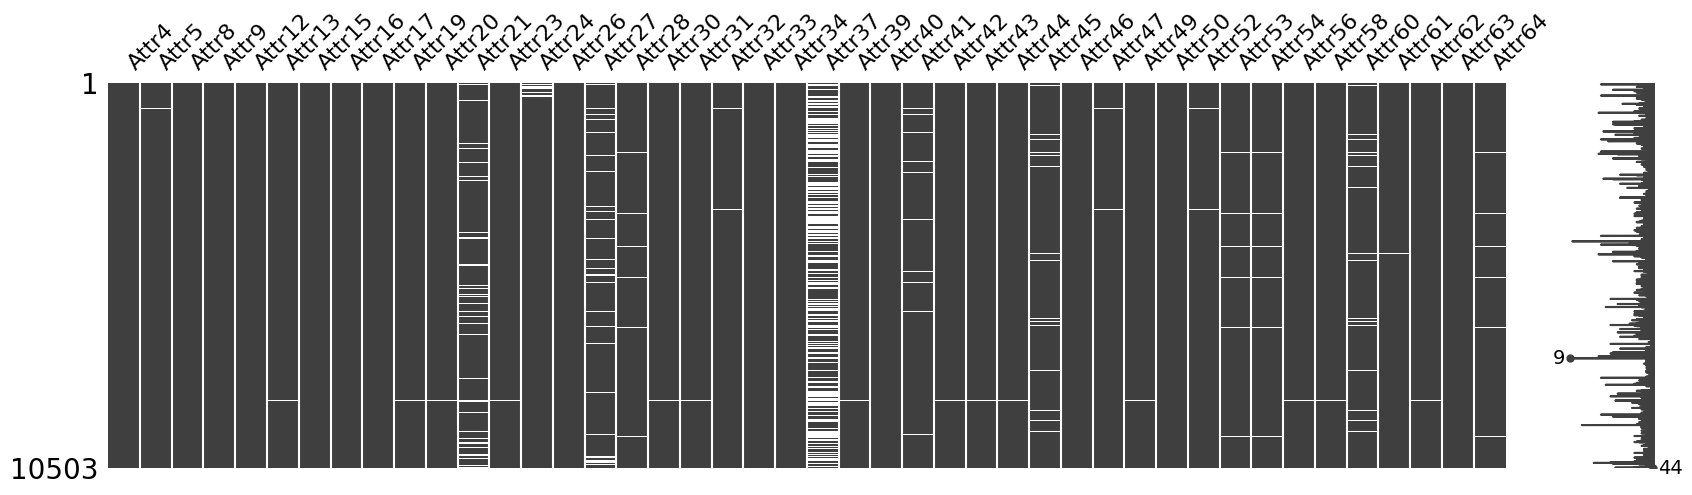

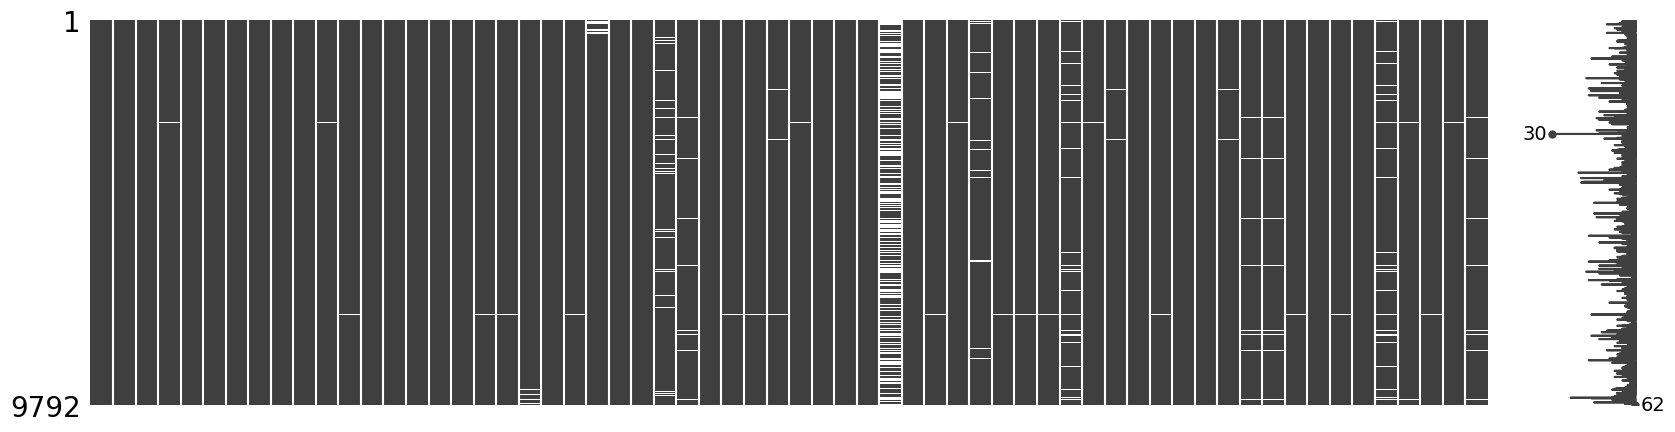

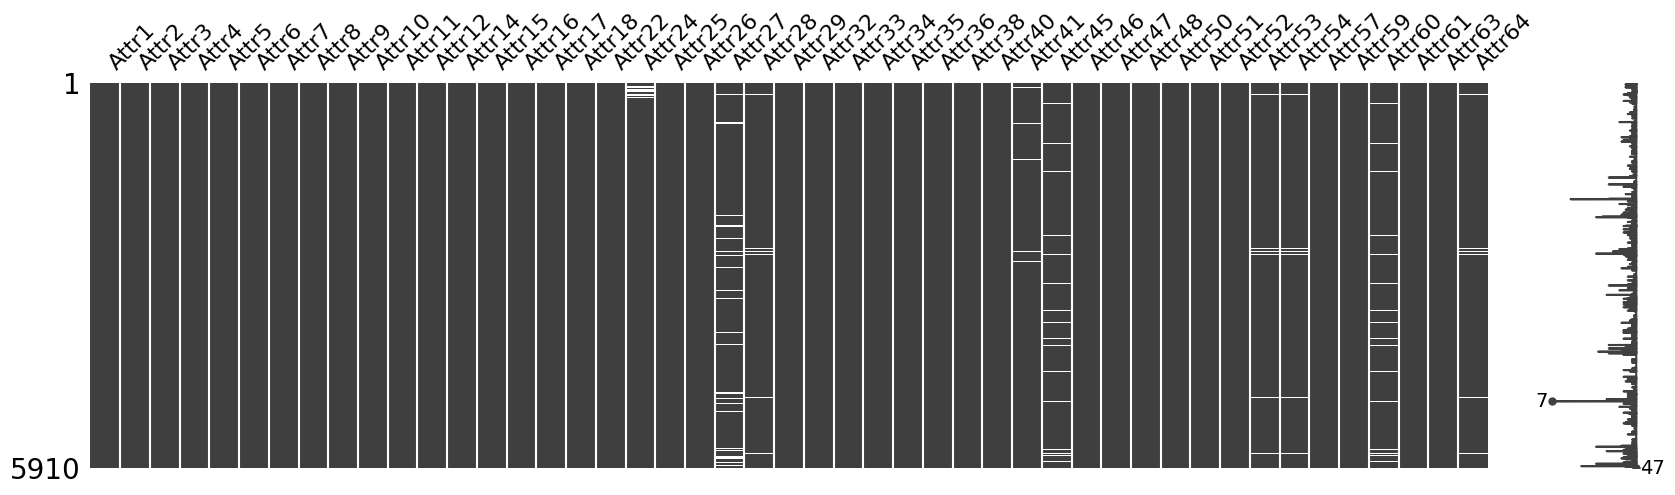

In [20]:

def generate_sparsity_matrix(datalist):
    for i in range(5):
        missing_df_i = datalist[i].columns[datalist[i].isna().any()].tolist()
        msno.matrix(datalist[i][missing_df_i],figsize=(20,5))

generate_sparsity_matrix(dfs)

## Missing Data Correlation Plot

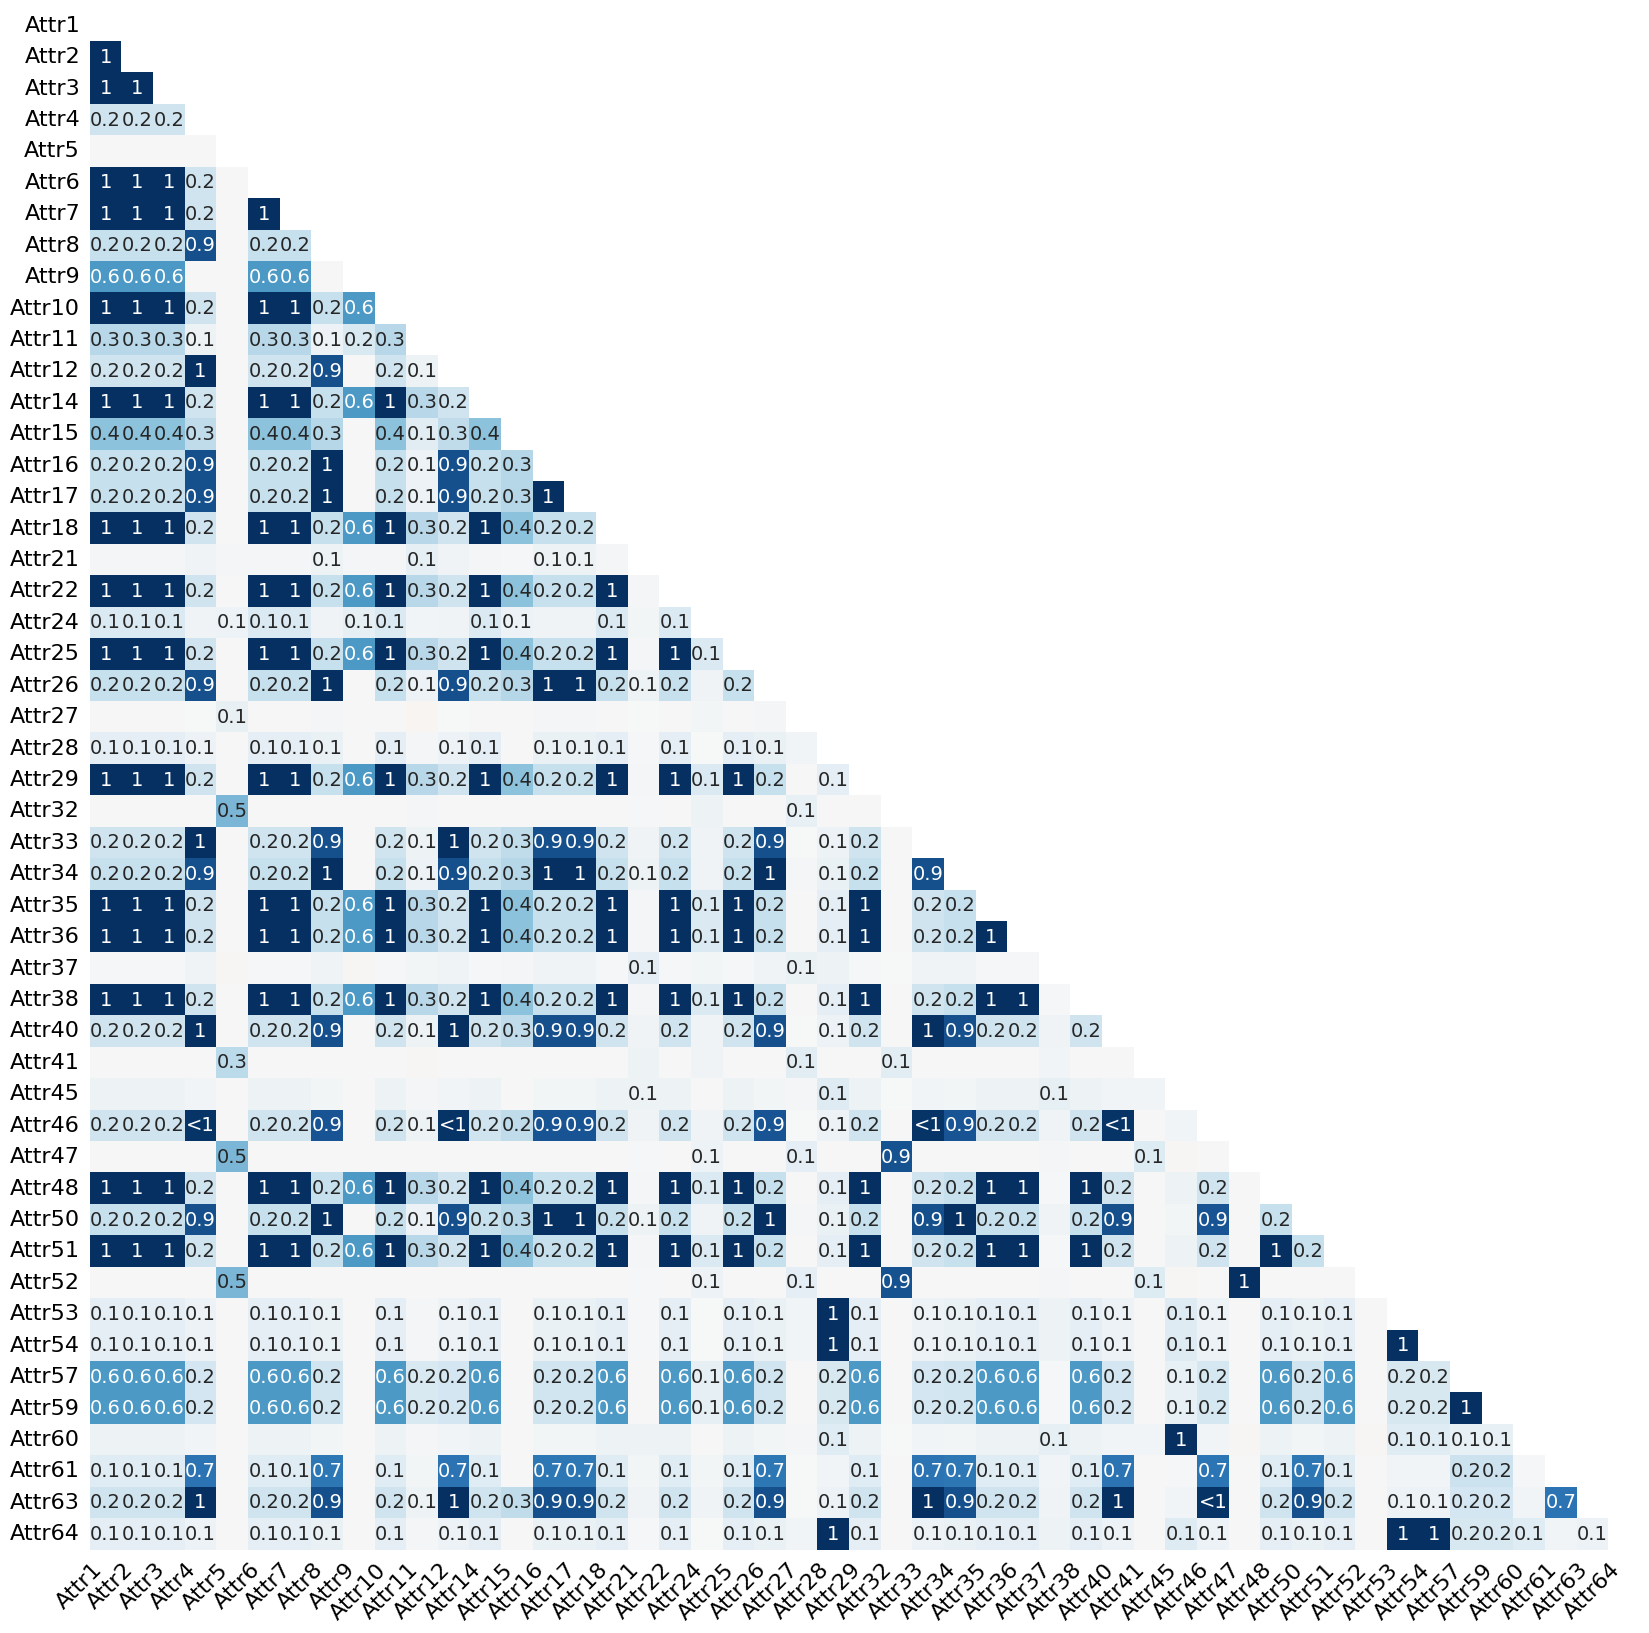

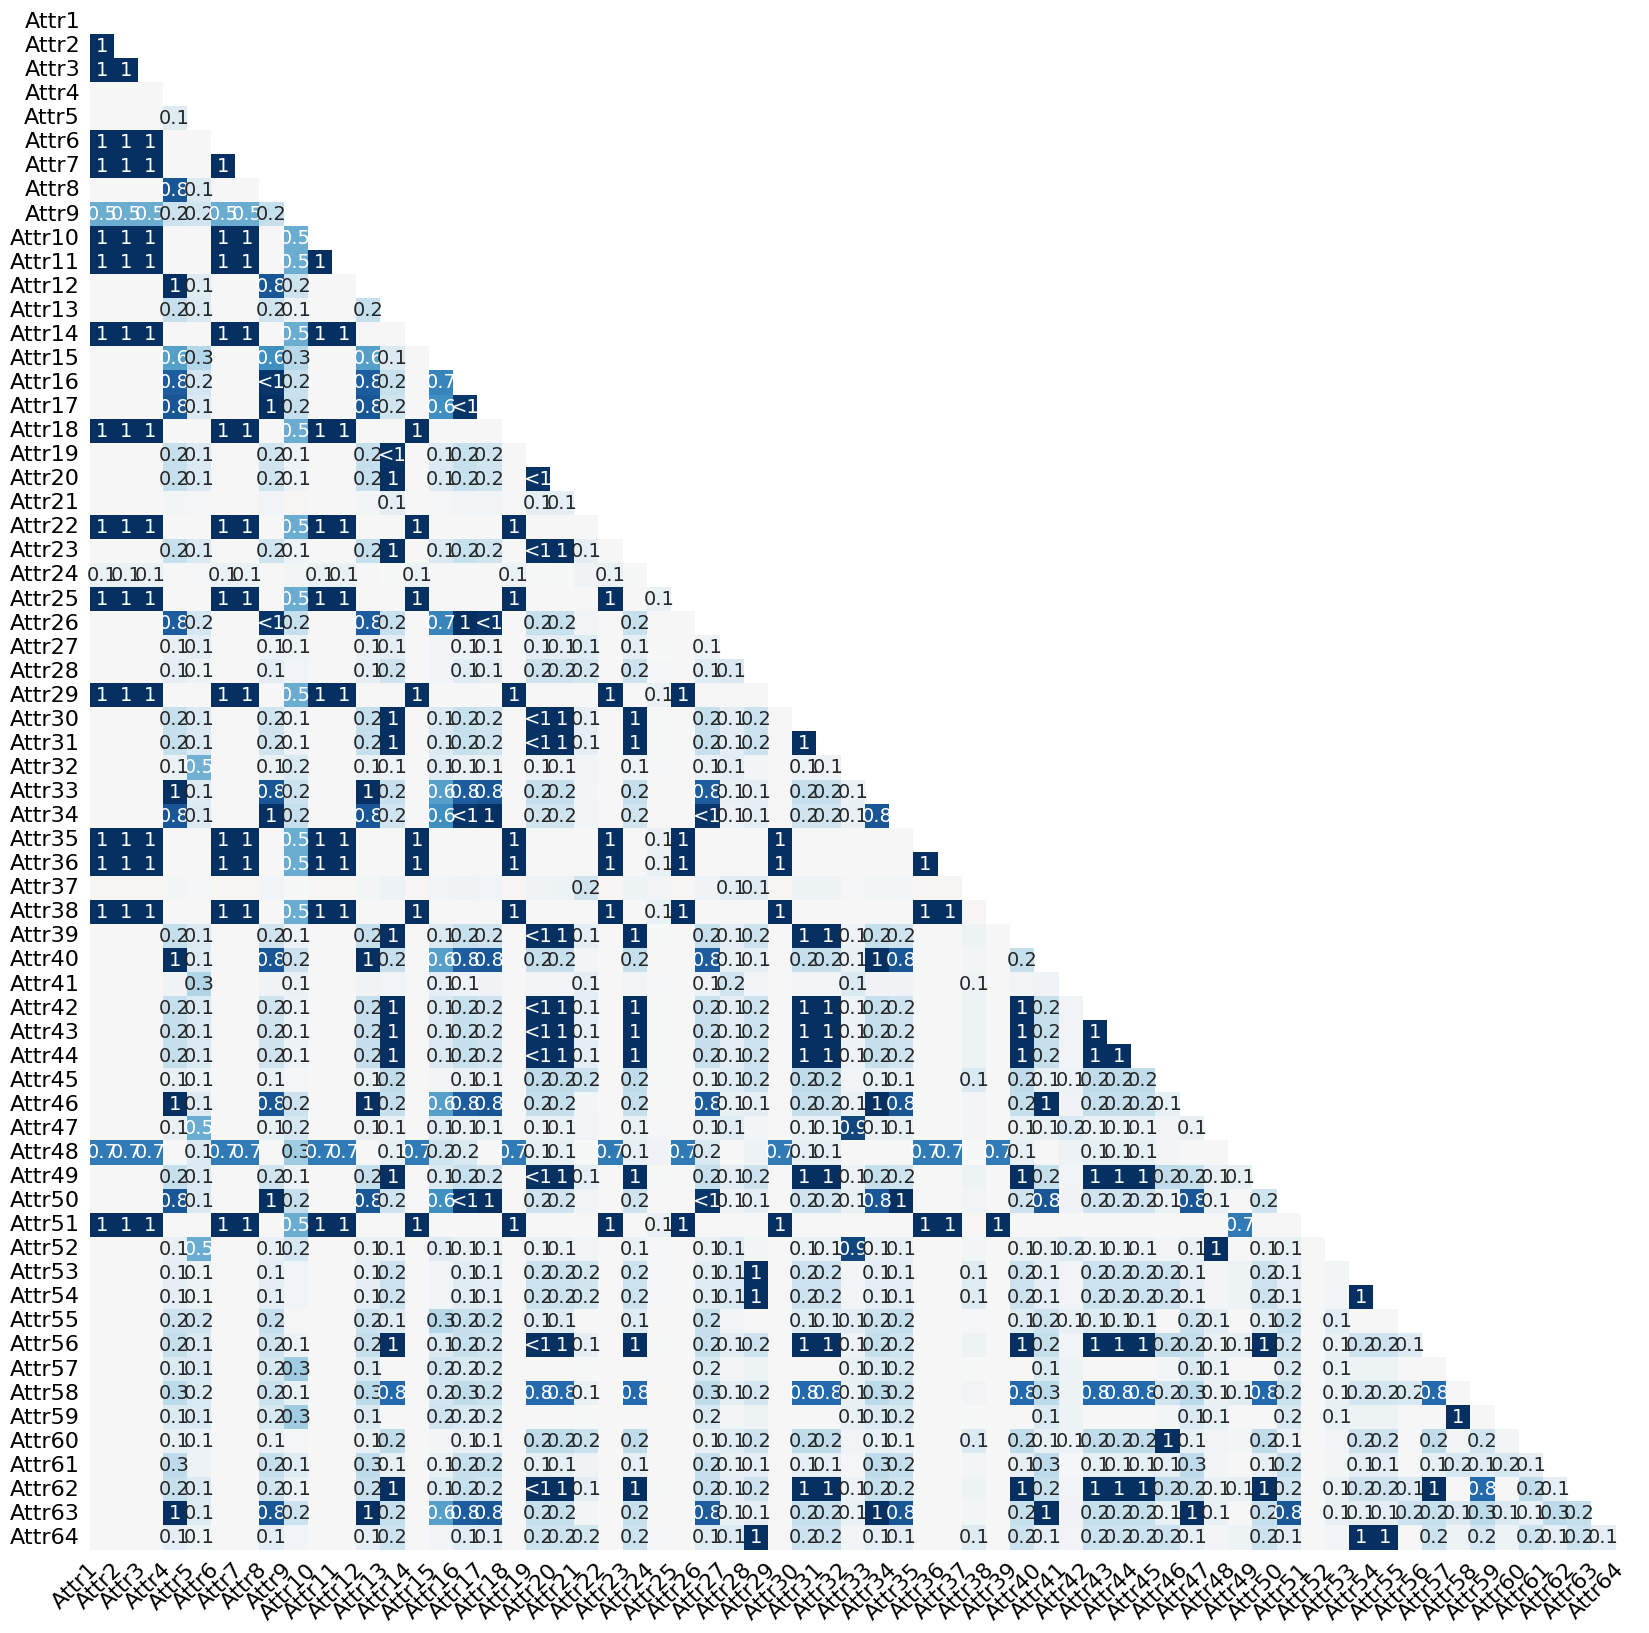

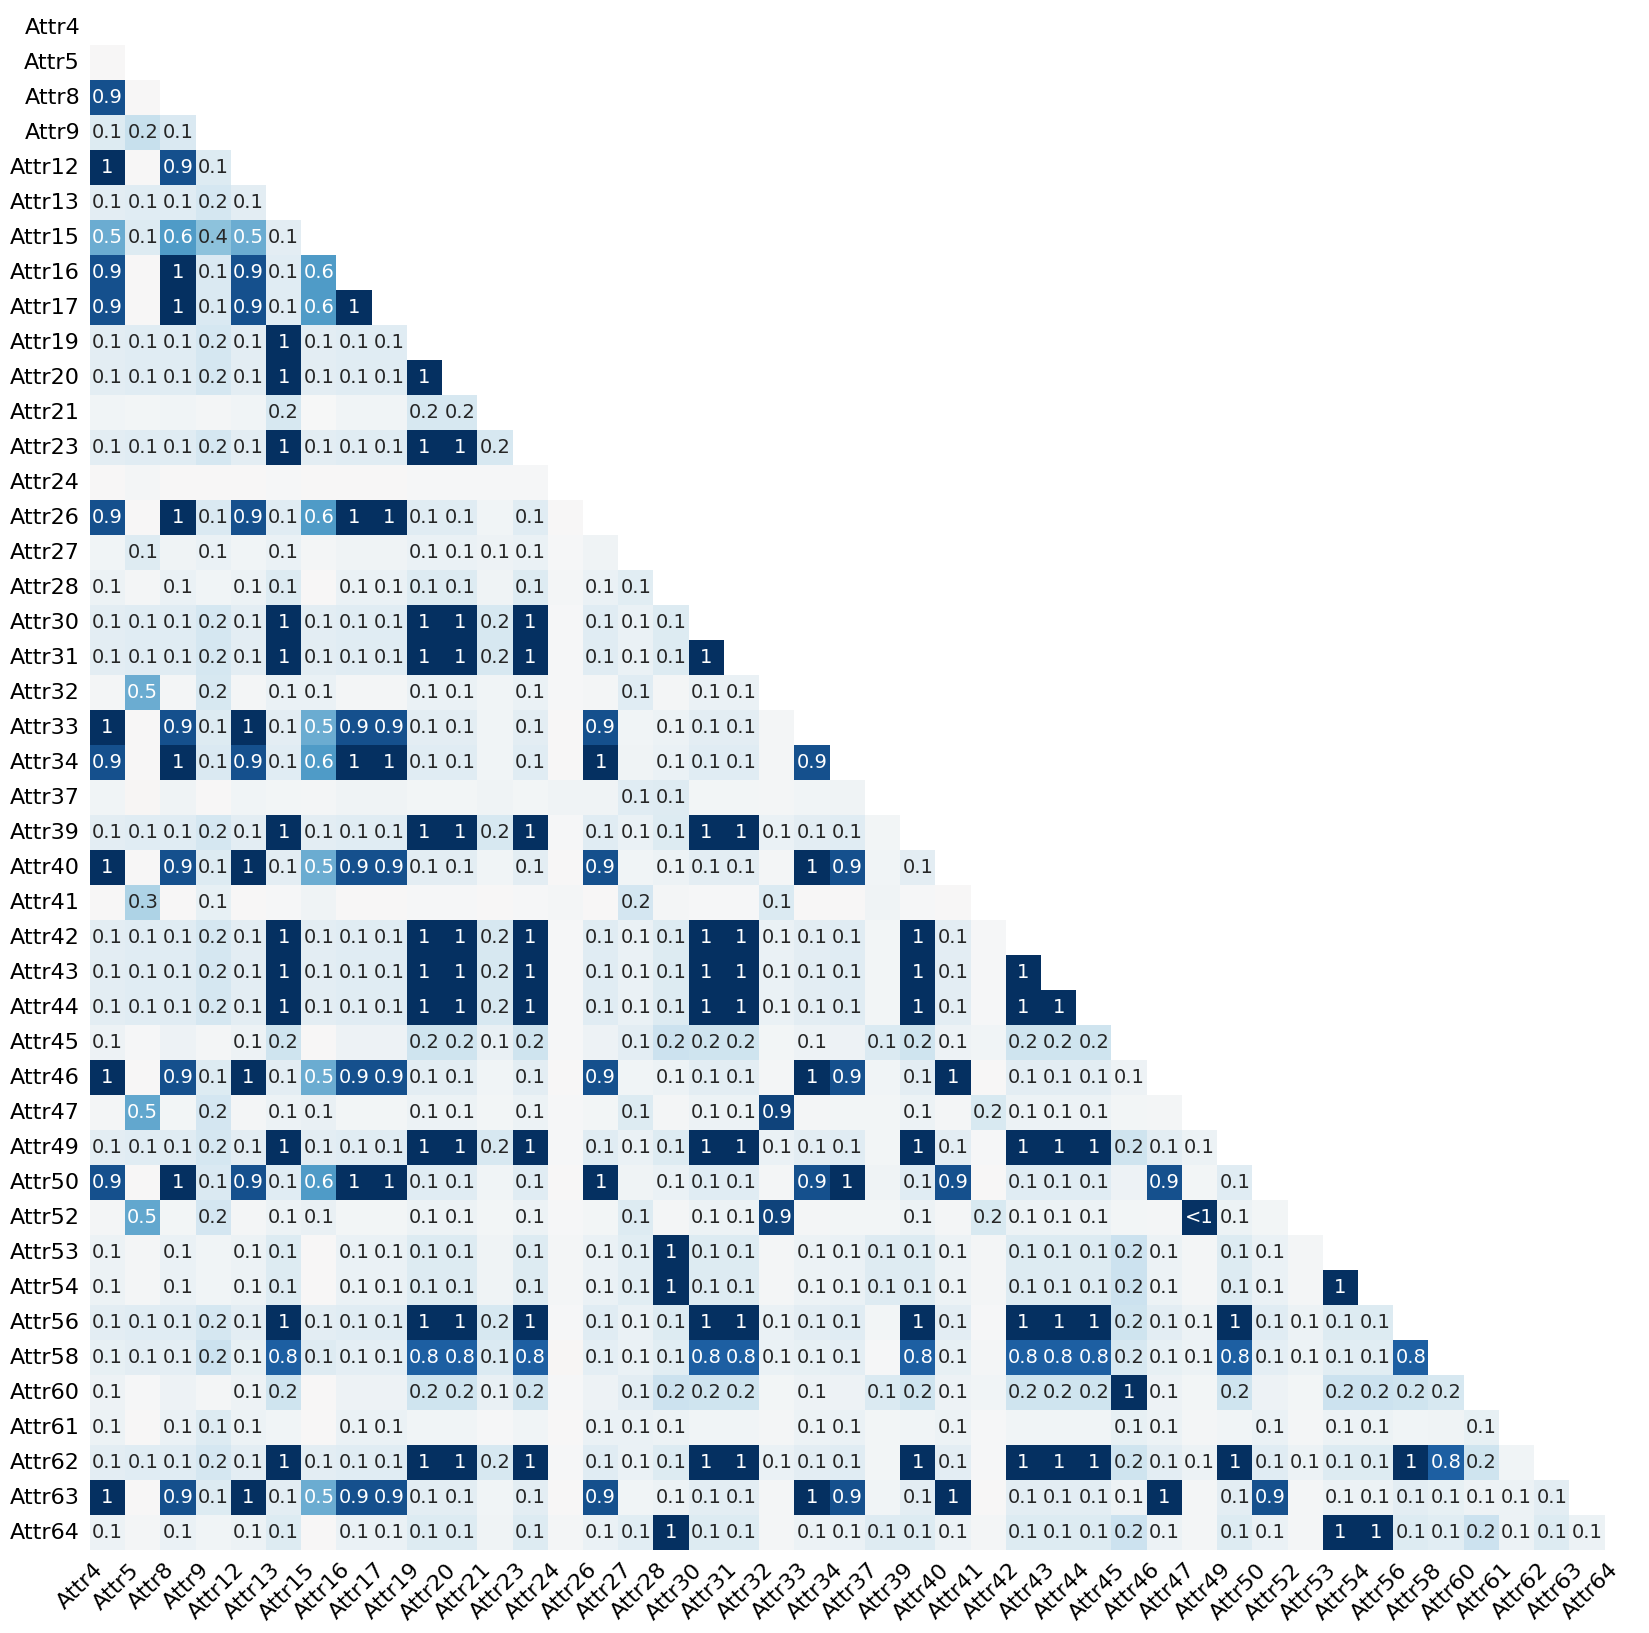

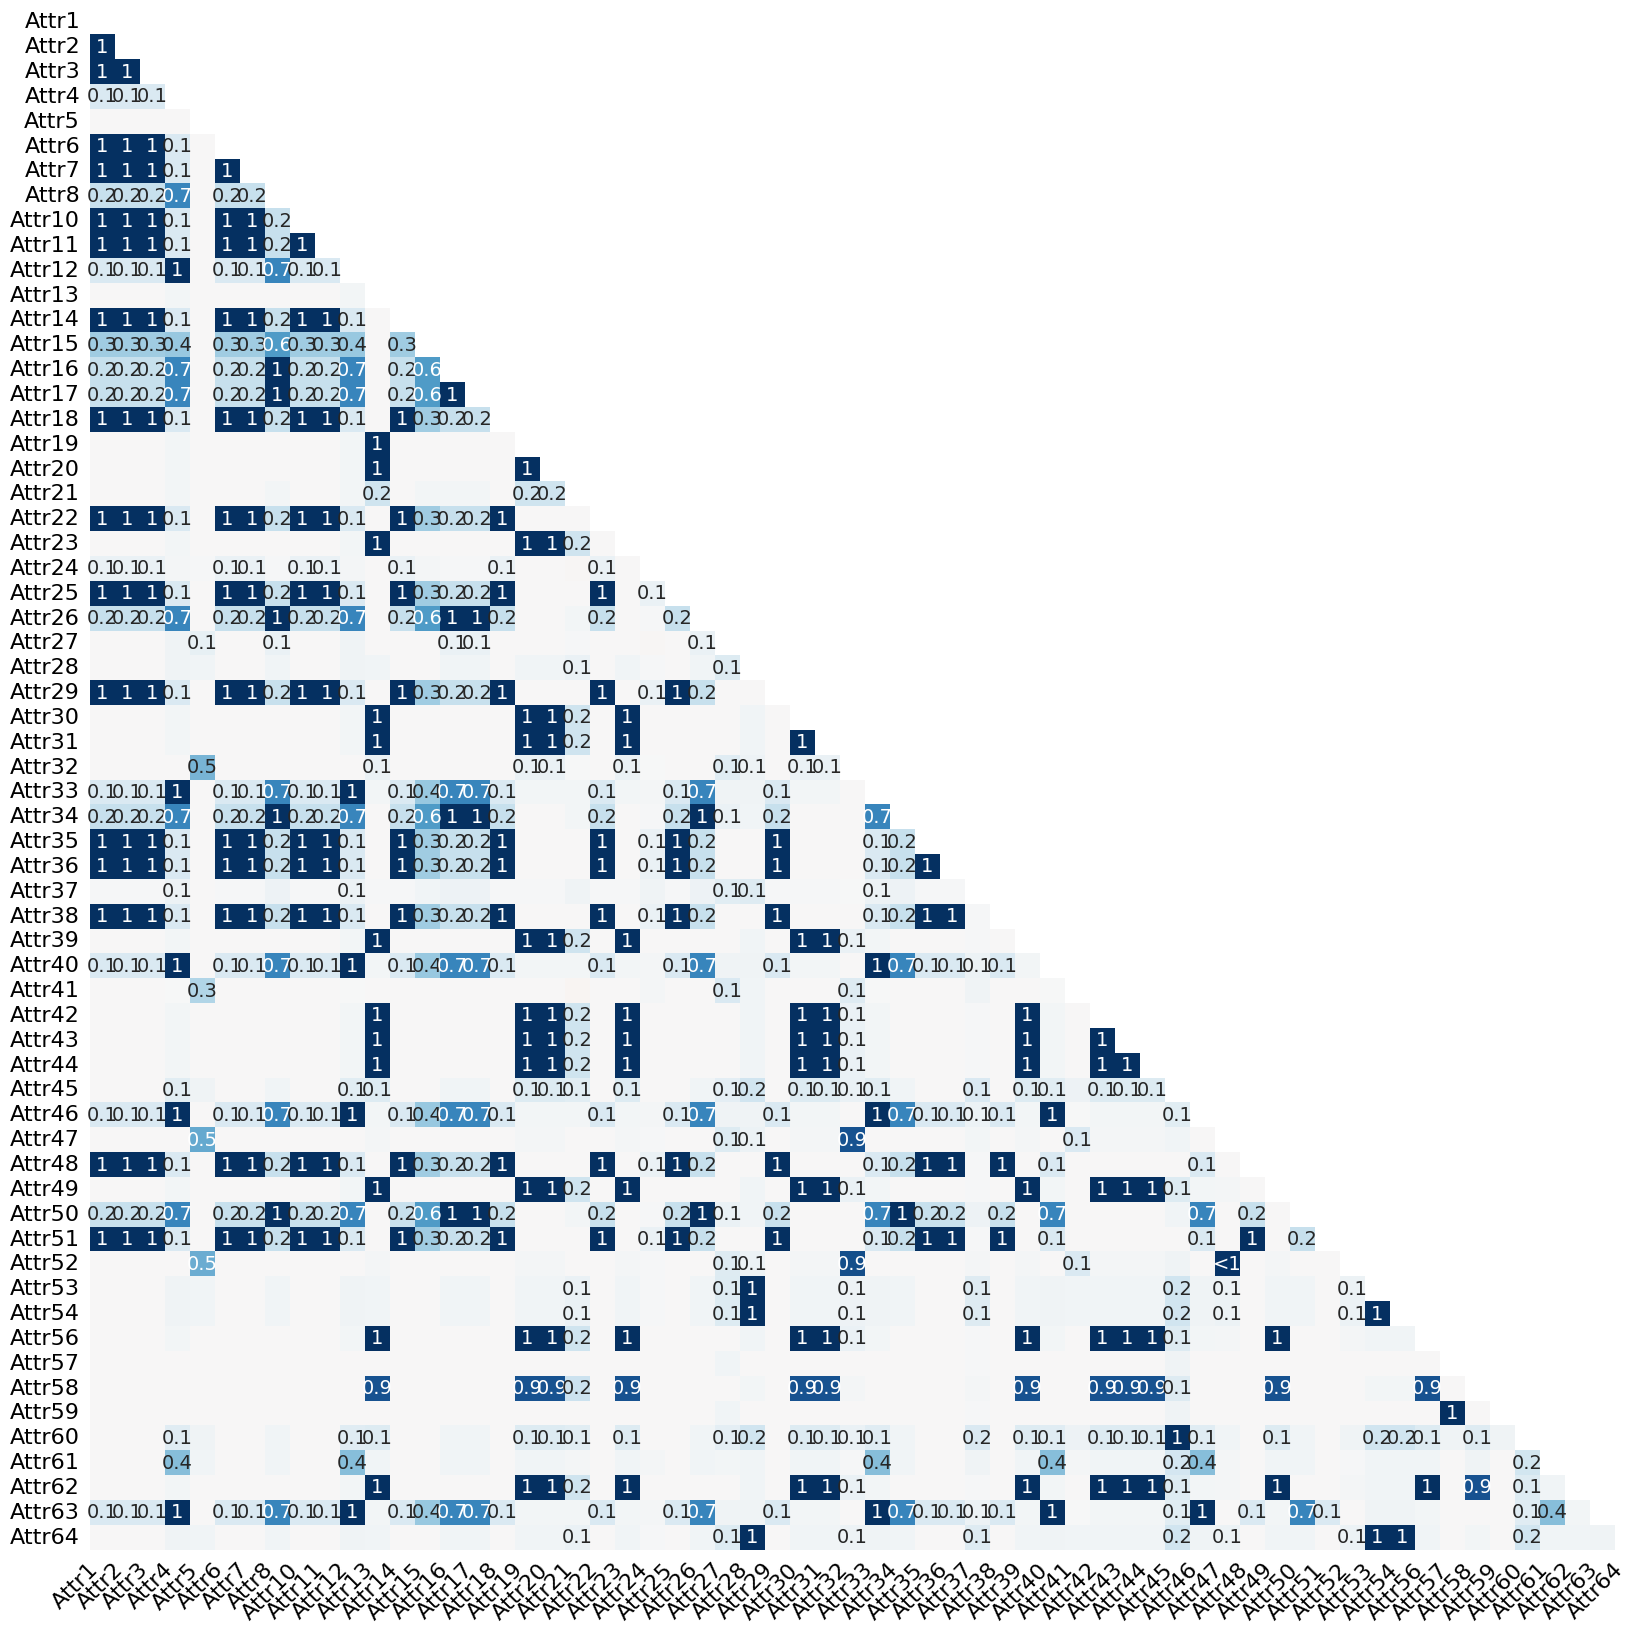

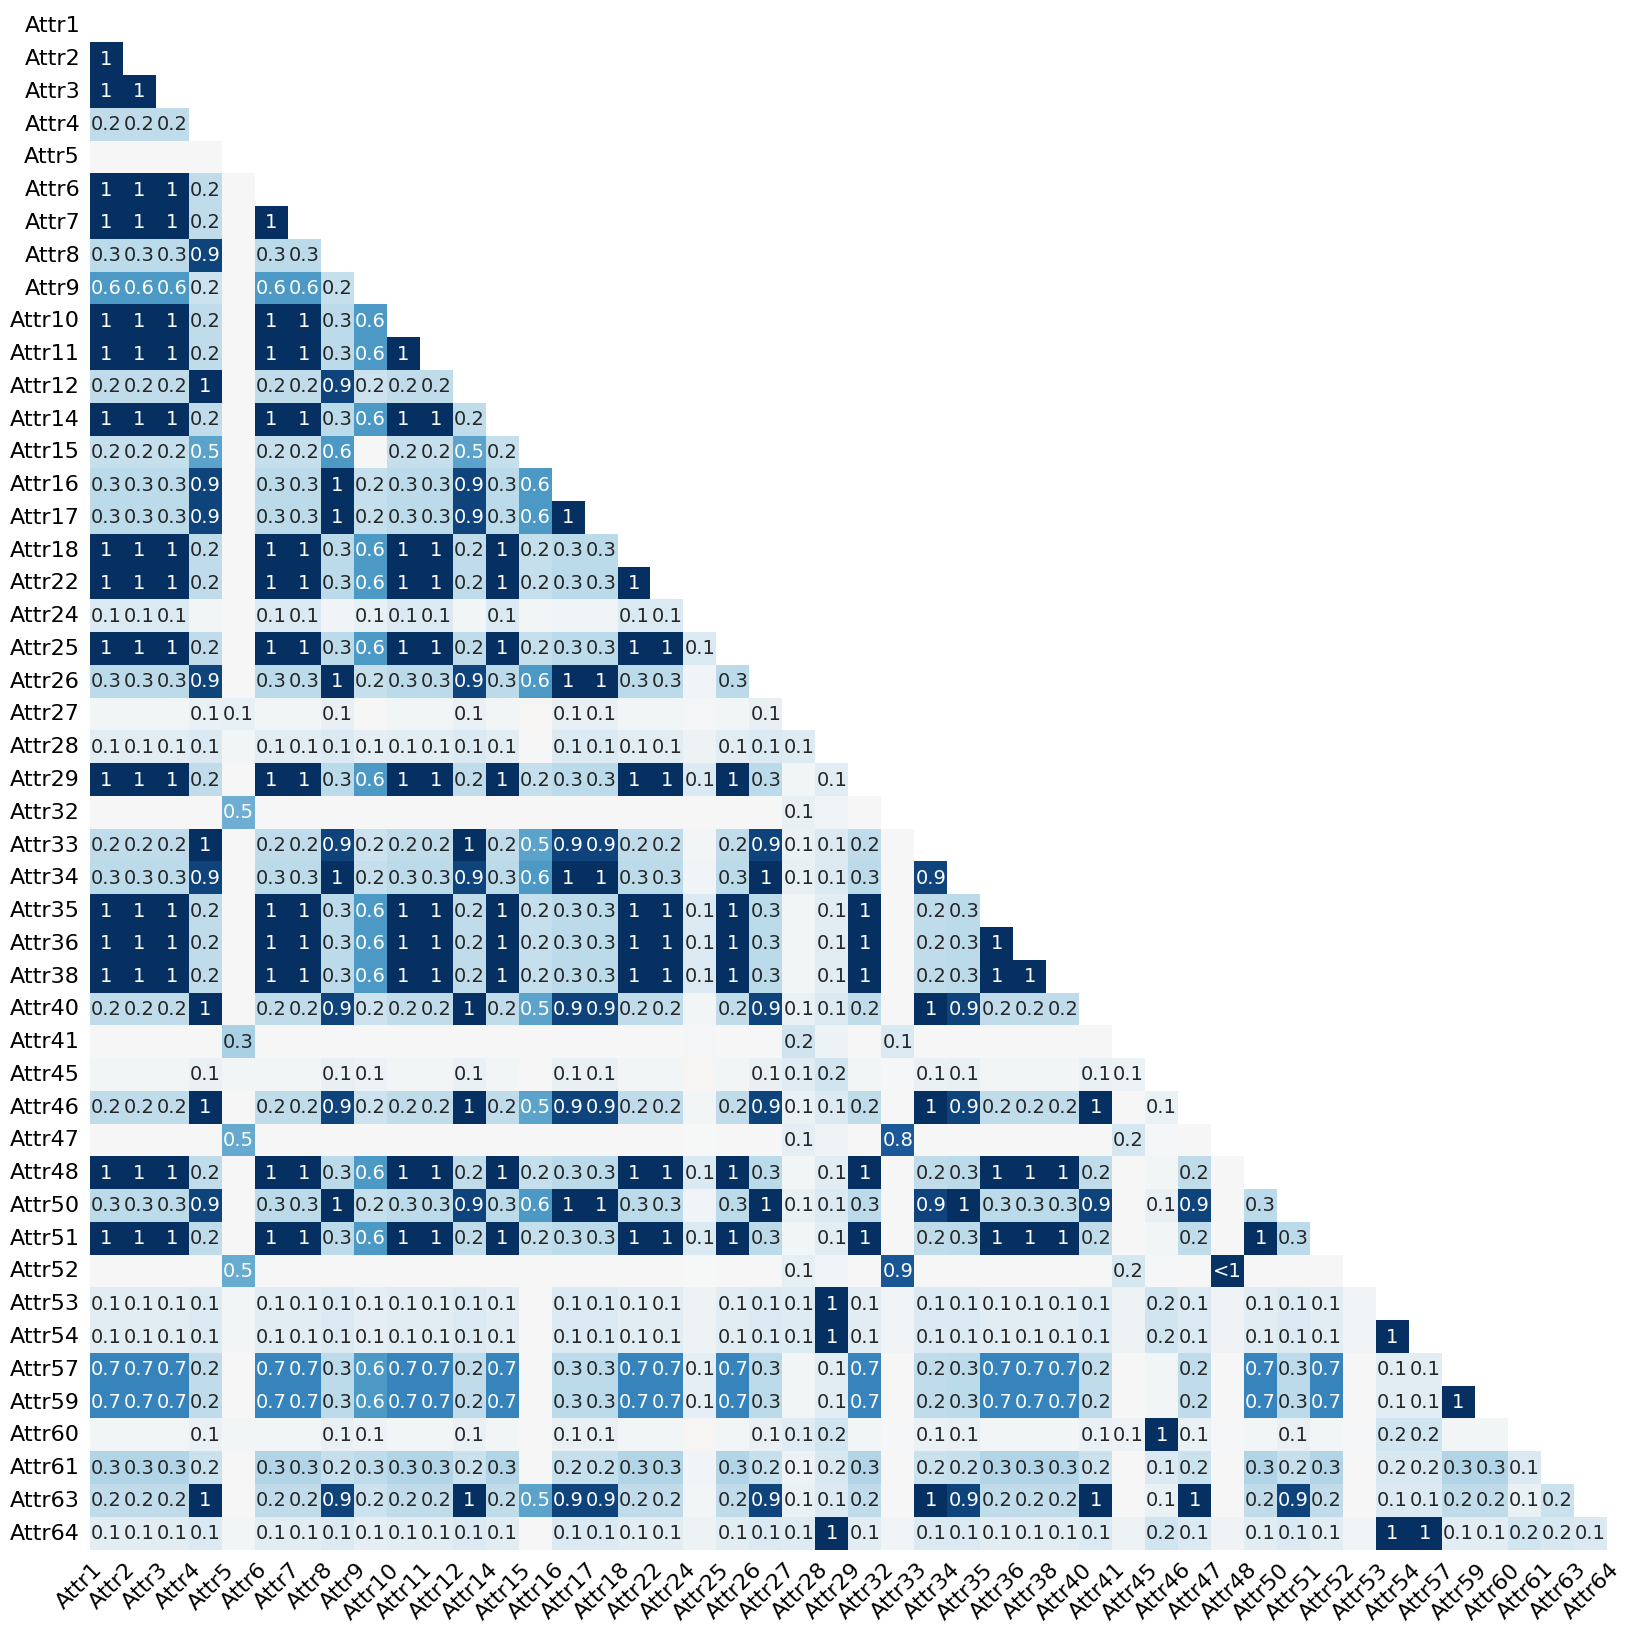

In [21]:
def missing_heatmap(datalist):
    for i in range(5):
        missing_df_i = datalist[i].columns[datalist[i].isna().any()].tolist()
        msno.heatmap(dfs[i][missing_df_i],figsize=(20,20), cbar=False)

missing_heatmap(dfs)

## Median Imputation

In [22]:
def perform_median_impute(datalist):
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    median_imputed_df = [pd.DataFrame(imputer.fit_transform(data))for data in datalist]
    for i in range(len(datalist)):
        median_imputed_df[i].columns = datalist[i].columns
    return median_imputed_df

median_imputed_dfs = perform_median_impute(dfs)

In [23]:
df_med = pd.concat(median_imputed_dfs, ignore_index=True)

## Inspecting Data Imbalance

Data: Year 1
class
0.0    6756
1.0     271
dtype: int64
Minority (label 1) percentage: 3.86%
----------------------------------------------------------------


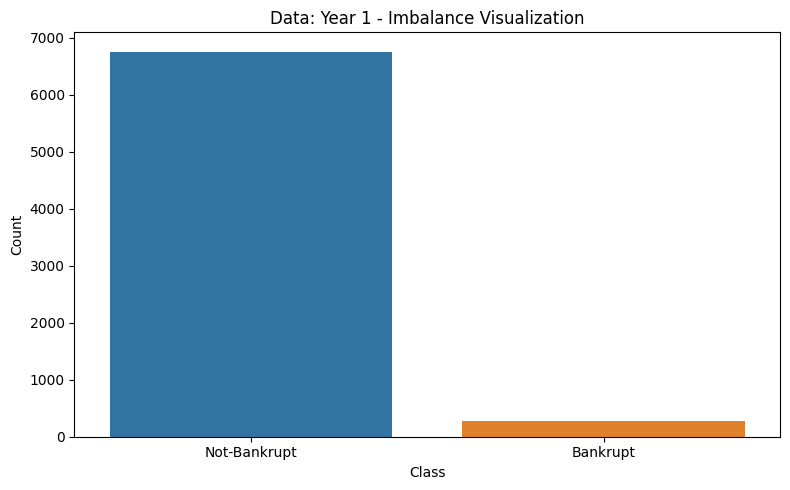

Data: Year 2
class
0.0    9773
1.0     400
dtype: int64
Minority (label 1) percentage: 3.93%
----------------------------------------------------------------


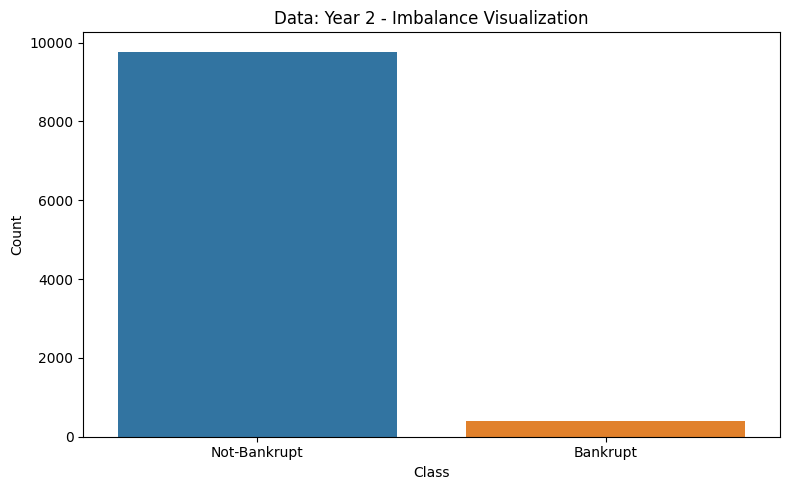

Data: Year 3
class
0.0    10008
1.0      495
dtype: int64
Minority (label 1) percentage: 4.71%
----------------------------------------------------------------


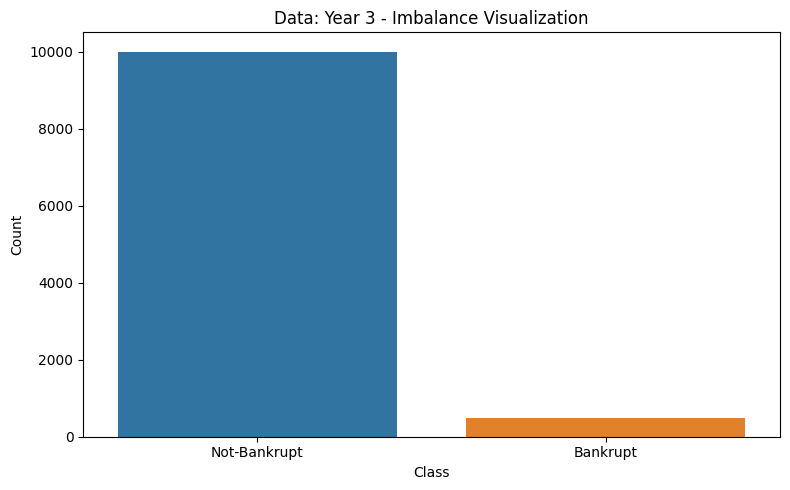

Data: Year 4
class
0.0    9277
1.0     515
dtype: int64
Minority (label 1) percentage: 5.26%
----------------------------------------------------------------


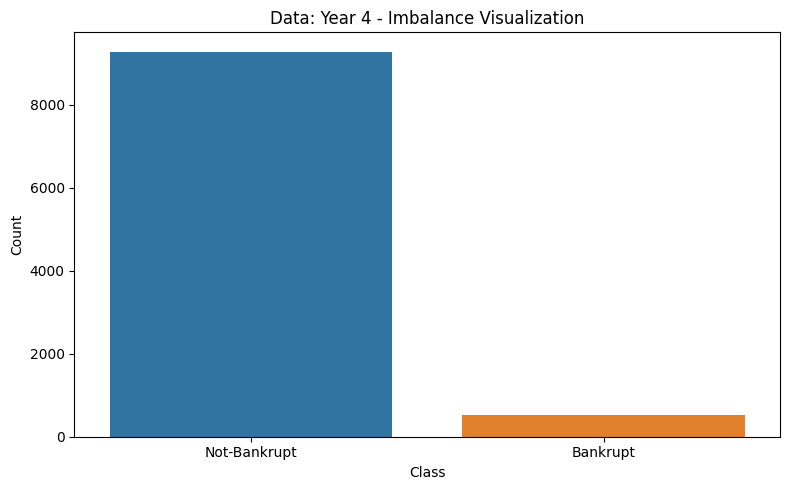

Data: Year 5
class
0.0    5500
1.0     410
dtype: int64
Minority (label 1) percentage: 6.94%
----------------------------------------------------------------


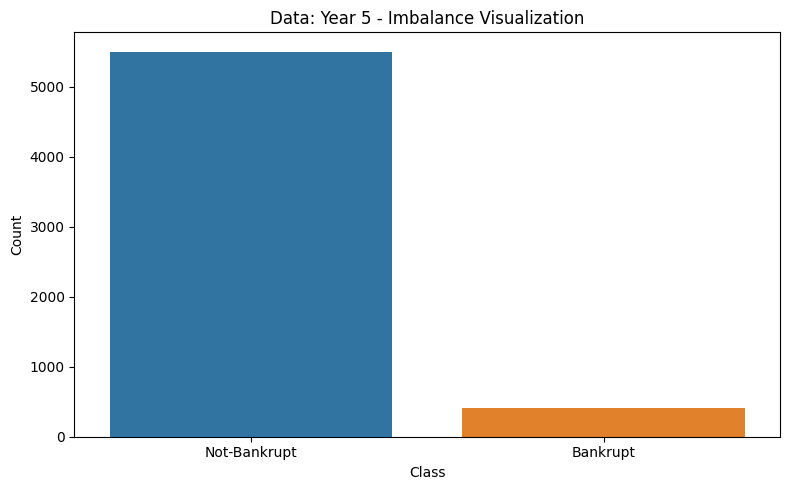

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def check_data_imbalance(datalist):
    for i, data in enumerate(datalist, 1):
        plt.figure(figsize=(8, 5))  # Adjust the figure size for each plot
        
        # Plotting the bar chart
        sns.countplot(x='class', data=data)

        # Setting title and labels
        plt.title(f'Data: Year {i} - Imbalance Visualization')
        plt.xlabel('Class')
        plt.ylabel('Count')
        
        # Changing x-axis labels
        plt.xticks(ticks=[0, 1], labels=['Not-Bankrupt', 'Bankrupt'])

        # Print the imbalance information
        minority_percentage = (data['class'].tolist().count(1) / len(data['class'].tolist())) * 100
        print(f'Data: Year {i}')
        print(data.groupby('class').size())
        print(f'Minority (label 1) percentage: {minority_percentage:.2f}%')
        print('-'*64)
        
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()  # Display the plot for this year

check_data_imbalance(median_imputed_dfs)



In [25]:
def check_data_imbalance(datalist):
    for i in range(len(datalist)):
        print('Data: '+ str(i+1) +' year')
        print(datalist[i].groupby('class').size())
        minority_percentage = (datalist[i]['class'].tolist().count(1) / len(datalist[i]['class'].tolist())) * 100
        print('Minority (label 1) percentage: ' + str(minority_percentage) + '%')
        print('-'*64)

check_data_imbalance(median_imputed_dfs)

Data: 1 year
class
0.0    6756
1.0     271
dtype: int64
Minority (label 1) percentage: 3.856553294435748%
----------------------------------------------------------------
Data: 2 year
class
0.0    9773
1.0     400
dtype: int64
Minority (label 1) percentage: 3.931976801336872%
----------------------------------------------------------------
Data: 3 year
class
0.0    10008
1.0      495
dtype: int64
Minority (label 1) percentage: 4.712939160239932%
----------------------------------------------------------------
Data: 4 year
class
0.0    9277
1.0     515
dtype: int64
Minority (label 1) percentage: 5.259395424836601%
----------------------------------------------------------------
Data: 5 year
class
0.0    5500
1.0     410
dtype: int64
Minority (label 1) percentage: 6.937394247038917%
----------------------------------------------------------------


# Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

def train_many_rf(datalist):
    X_train,X_test,y_train,y_test = train_test_split(
        datalist.drop(columns='class'),datalist['class'],
        test_size=.2,random_state=12,
    )

    clf = RandomForestClassifier(n_estimators=100, random_state=12)
    clf.fit(X_train,y_train)

    score = clf.score(X_test,y_test)
    print(f"Model score: {score}")

    return clf

models = [train_many_rf(df) for df in median_imputed_dfs]

Model score: 0.9587482219061166
Model score: 0.9567567567567568
Model score: 0.9509757258448358
Model score: 0.9515058703420113
Model score: 0.9348561759729273


In [27]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Function does same thing with RF above but with a GridSearch
def train_tuned_rf(datalist):
    X_train,X_test,y_train,y_test = train_test_split(
        datalist.drop(columns='class'),datalist['class'],
        test_size=.2,random_state=12,
    )

    param_dist = {
        'n_estimators': [100],
        'max_depth': np.arange(1, 50),
        'min_samples_split': np.arange(2, 20),
        'min_samples_leaf': np.arange(1, 20),
        'criterion': ['gini','entropy']
    }

    clf = RandomForestClassifier(random_state=12, class_weight='balanced')
    
    random_search = RandomizedSearchCV(
        clf,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='accuracy',
        random_state=12,
        n_jobs=-1
    )
    
    random_search.fit(X_train, y_train)
    
    clf = random_search.best_estimator_
    
    score = clf.score(X_test, y_test)
    print(f"Model score: {score}")

    return clf


In [28]:
models = [train_tuned_rf(df) for df in median_imputed_dfs]

Model score: 0.9623044096728307
Model score: 0.9597051597051597
Model score: 0.9566872917658258
Model score: 0.9499744767738643
Model score: 0.9331641285956007


## Random Forest Model Outputs


Classification Report for Year 1 with Optimal Threshold 0.1394:

              precision    recall  f1-score   support

Not Bankrupt       0.99      0.83      0.90      1344
    Bankrupt       0.17      0.74      0.27        62

    accuracy                           0.83      1406
   macro avg       0.58      0.79      0.59      1406
weighted avg       0.95      0.83      0.87      1406



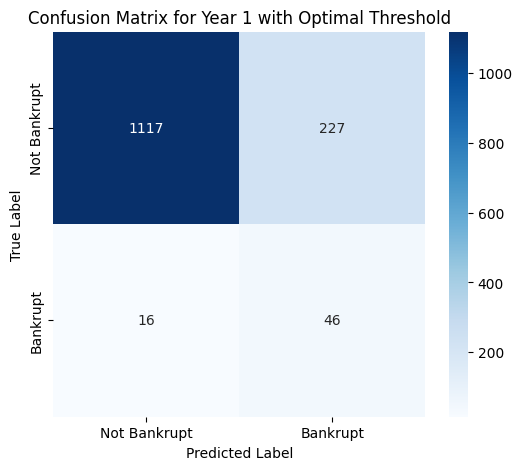

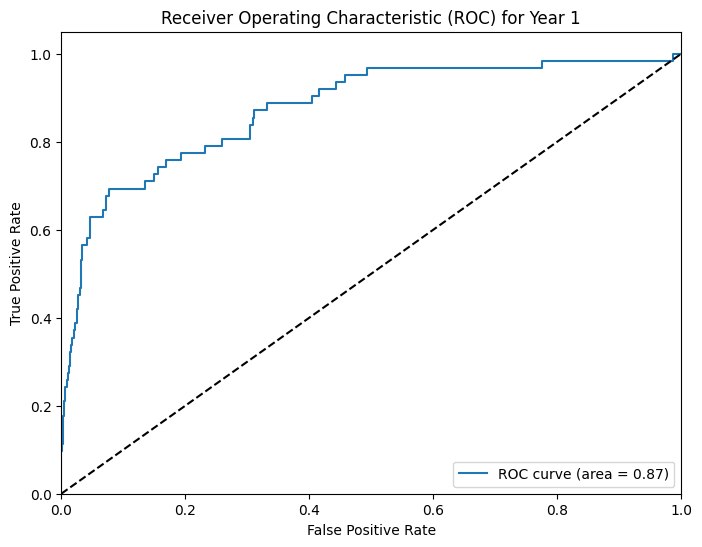


Classification Report for Year 2 with Optimal Threshold 0.1203:

              precision    recall  f1-score   support

Not Bankrupt       0.99      0.81      0.89      1943
    Bankrupt       0.17      0.82      0.28        92

    accuracy                           0.81      2035
   macro avg       0.58      0.81      0.59      2035
weighted avg       0.95      0.81      0.86      2035



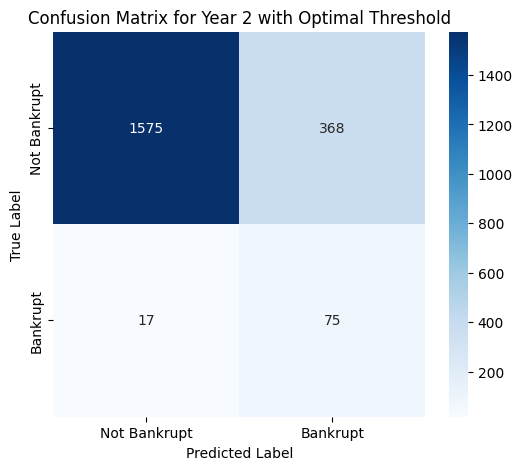

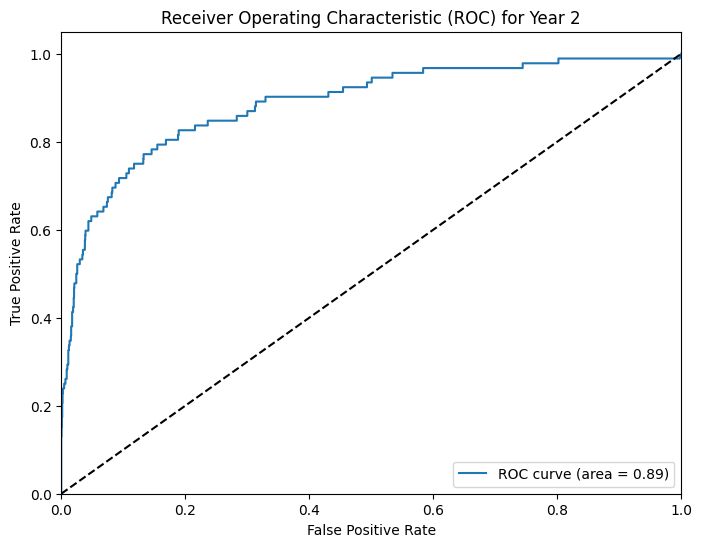


Classification Report for Year 3 with Optimal Threshold 0.1983:

              precision    recall  f1-score   support

Not Bankrupt       0.99      0.81      0.89      1996
    Bankrupt       0.18      0.81      0.30       105

    accuracy                           0.81      2101
   macro avg       0.59      0.81      0.60      2101
weighted avg       0.95      0.81      0.86      2101



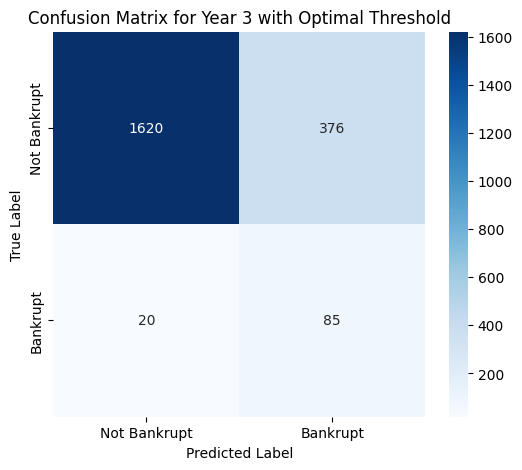

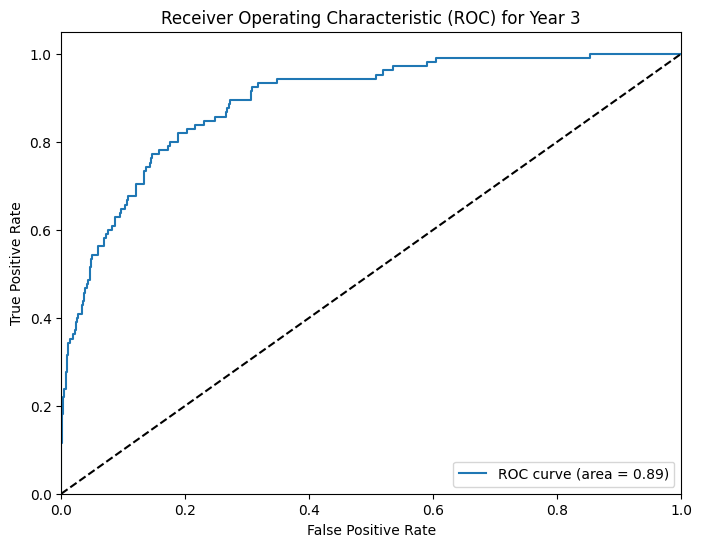


Classification Report for Year 4 with Optimal Threshold 0.1733:

              precision    recall  f1-score   support

Not Bankrupt       0.99      0.82      0.90      1861
    Bankrupt       0.19      0.81      0.31        98

    accuracy                           0.82      1959
   macro avg       0.59      0.81      0.60      1959
weighted avg       0.95      0.82      0.87      1959



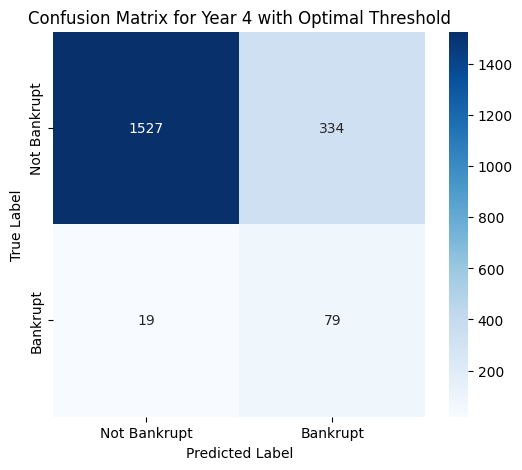

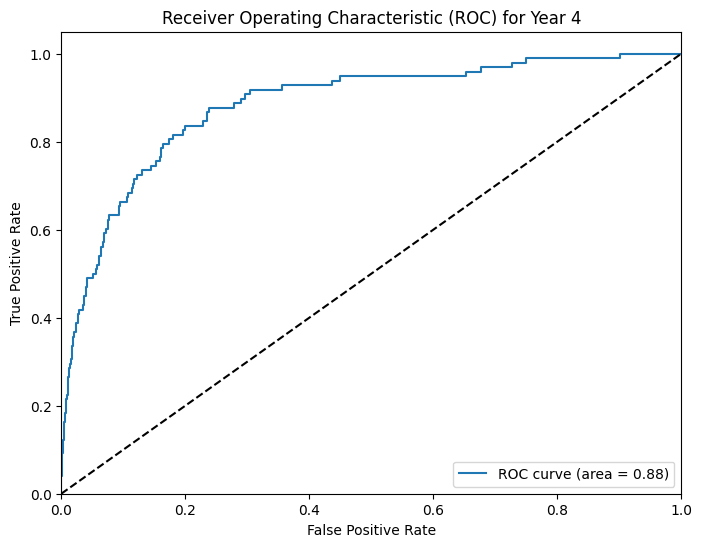


Classification Report for Year 5 with Optimal Threshold 0.1528:

              precision    recall  f1-score   support

Not Bankrupt       0.98      0.85      0.91      1095
    Bankrupt       0.30      0.80      0.44        87

    accuracy                           0.85      1182
   macro avg       0.64      0.83      0.67      1182
weighted avg       0.93      0.85      0.88      1182



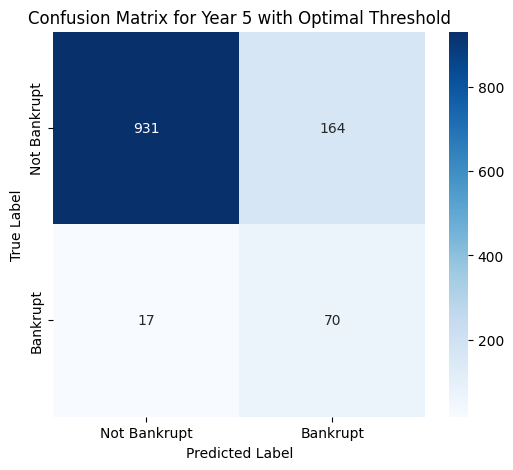

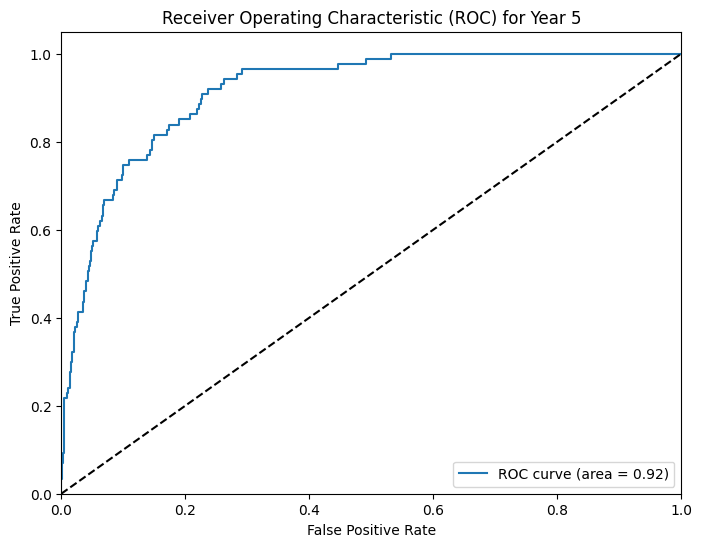

In [29]:
from sklearn.metrics import f1_score, classification_report, roc_curve, auc, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

def train_tuned_rf(datalist):
    X_train, X_test, y_train, y_test = train_test_split(
        datalist.drop(columns='class'), datalist['class'],
        test_size=.2, random_state=12
    )

    param_dist = {
        'n_estimators': [500],
        'max_depth': np.arange(1, 50),
        'min_samples_split': np.arange(2, 20),
        'min_samples_leaf': np.arange(1, 20),
        'criterion': ['gini','entropy']
    }

    clf = RandomForestClassifier(random_state=12, class_weight='balanced')
    
    random_search = RandomizedSearchCV(
        clf,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='accuracy',
        random_state=12,
        n_jobs=-1
    )
    
    random_search.fit(X_train, y_train)
    clf = random_search.best_estimator_

    return clf, X_test, y_test

def find_optimal_threshold(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    distance_to_corner = np.sqrt((1-tpr)**2 + fpr**2)
    best_threshold = thresholds[np.argmin(distance_to_corner)]
    return best_threshold

def evaluate_model(model, X_test, y_test, idx):
    y_prob = model.predict_proba(X_test)[:, 1]
    optimal_threshold = find_optimal_threshold(y_test, y_prob)
    y_pred_adjusted = (y_prob > optimal_threshold).astype(int)

    print(f"\nClassification Report for Year {idx} with Optimal Threshold {optimal_threshold:.4f}:\n")
    print(classification_report(y_test, y_pred_adjusted, target_names=['Not Bankrupt', 'Bankrupt']))

    cm = confusion_matrix(y_test, y_pred_adjusted)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, xticklabels=['Not Bankrupt', 'Bankrupt'], yticklabels=['Not Bankrupt', 'Bankrupt'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Year {idx} with Optimal Threshold')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) for Year {idx}')
    plt.legend(loc="lower right")
    plt.show()

for idx, df in enumerate(median_imputed_dfs, start=1):
    model, X_test, y_test = train_tuned_rf(df)
    evaluate_model(model, X_test, y_test, idx)




<hr>

# XGBOOST

## Randomized Param Search

In [30]:
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from sklearn.utils.class_weight import compute_class_weight

def train_many_xgb(datalist):
    
    X_train, X_test, y_train, y_test = train_test_split(
        datalist.drop(columns='class'),
        datalist['class'],
        test_size=.2,
        random_state=12
    )

        # Compute class weights
    class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
    scale_pos_weight = class_weights[0] / class_weights[1]


    param_dist = {
    'max_depth': list(range(3,12)),
    'min_child_weight': randint(1, 7),
    'gamma': uniform(0, 0.5),
    'eta': [.001, .003, .01, .03, 0.1, 0.2, 0.3, 0.4],
    'objective': ['binary:logistic'],
    'scale_pos_weight': [scale_pos_weight]
}


    # param_dist = {
    #     'max_depth': list(range(3,12)),
    #     'min_child_weight': randint(1, 5),
    #     'gamma': uniform(0, 0.5),
    #     'eta': [.001, .01, .03, 0.1, 0.2, 0.3], 
    #     'objective': ['binary:logistic'],
    #     'scale_pos_weight': [scale_pos_weight]
    # }
    
    boost = XGBClassifier(eval_metric = 'logloss',n_estimators = 500)

    random_search = RandomizedSearchCV(
        boost,
        param_distributions=param_dist,
        n_iter = 30,
        scoring = 'accuracy',
        cv=5,
        verbose = 1,
        n_jobs=-1
    )

    random_search.fit(X_train,y_train)

    print(f'Best Params: {random_search.best_params_}')

    bst = random_search.best_estimator_
    preds = bst.predict(X_test)

models = [train_many_xgb(df) for df in median_imputed_dfs]

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params: {'eta': 0.03, 'gamma': 0.16175846510622316, 'max_depth': 4, 'min_child_weight': 3, 'objective': 'binary:logistic', 'scale_pos_weight': 0.038617886178861784}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params: {'eta': 0.1, 'gamma': 0.09264967666690627, 'max_depth': 11, 'min_child_weight': 1, 'objective': 'binary:logistic', 'scale_pos_weight': 0.039335887611749686}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params: {'eta': 0.4, 'gamma': 0.1964270662089766, 'max_depth': 10, 'min_child_weight': 1, 'objective': 'binary:logistic', 'scale_pos_weight': 0.04867698452321517}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params: {'eta': 0.4, 'gamma': 0.279074888229648, 'max_depth': 6, 'min_child_weight': 1, 'objective': 'binary:logistic', 'scale_pos_weight': 0.05622977346278318}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params: {'e

## XGB Log Loss Plots For Each Model - Best Params

Early stopping was triggered after 9 rounds.


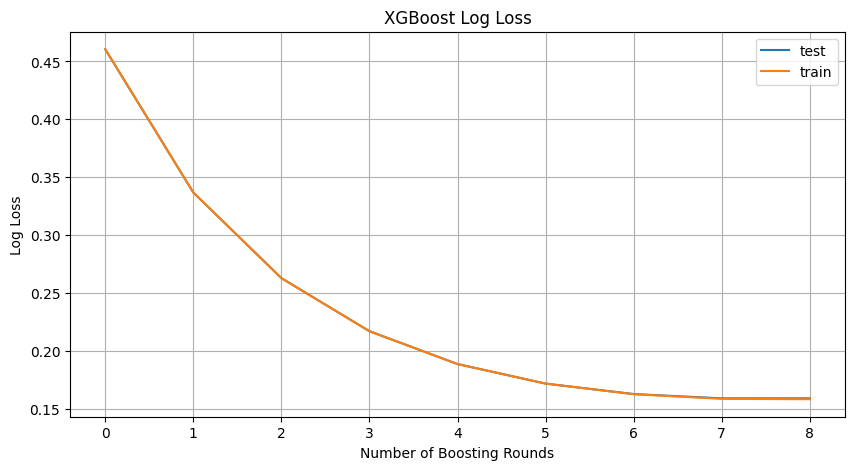

[0]	eval-logloss:0.46464	train-logloss:0.46050
[1]	eval-logloss:0.34412	train-logloss:0.33679
[2]	eval-logloss:0.27298	train-logloss:0.26287
[3]	eval-logloss:0.22968	train-logloss:0.21704
[4]	eval-logloss:0.20370	train-logloss:0.18869
[5]	eval-logloss:0.18912	train-logloss:0.17183
[6]	eval-logloss:0.18228	train-logloss:0.16279
[7]	eval-logloss:0.18059	train-logloss:0.15867
[8]	eval-logloss:0.18264	train-logloss:0.15834
[9]	eval-logloss:0.18632	train-logloss:0.15971
[10]	eval-logloss:0.19220	train-logloss:0.16329
[11]	eval-logloss:0.19944	train-logloss:0.16848
[12]	eval-logloss:0.20718	train-logloss:0.17357
[13]	eval-logloss:0.21490	train-logloss:0.17889
[14]	eval-logloss:0.21891	train-logloss:0.17885
[15]	eval-logloss:0.22436	train-logloss:0.18067
[16]	eval-logloss:0.22813	train-logloss:0.18075
[17]	eval-logloss:0.23179	train-logloss:0.18117
[18]	eval-logloss:0.23142	train-logloss:0.17992
[19]	eval-logloss:0.23117	train-logloss:0.17867
[20]	eval-logloss:0.23156	train-logloss:0.17788
[2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[38]	eval-logloss:0.19743	train-logloss:0.13446
[39]	eval-logloss:0.19523	train-logloss:0.13268
[40]	eval-logloss:0.19510	train-logloss:0.13182
[41]	eval-logloss:0.19334	train-logloss:0.12996
[42]	eval-logloss:0.19142	train-logloss:0.12832
[43]	eval-logloss:0.18994	train-logloss:0.12663
[44]	eval-logloss:0.18928	train-logloss:0.12604
[45]	eval-logloss:0.18819	train-logloss:0.12497
[46]	eval-logloss:0.18592	train-logloss:0.12382
[47]	eval-logloss:0.18545	train-logloss:0.12240
[48]	eval-logloss:0.18455	train-logloss:0.12150
[49]	eval-logloss:0.18462	train-logloss:0.12075
[50]	eval-logloss:0.18386	train-logloss:0.11962
[51]	eval-logloss:0.18287	train-logloss:0.11860
[52]	eval-logloss:0.18301	train-logloss:0.11767
[53]	eval-logloss:0.18163	train-logloss:0.11650
[54]	eval-logloss:0.17984	train-logloss:0.11530
[55]	eval-logloss:0.17909	train-logloss:0.11429
[56]	eval-logloss:0.17853	train-logloss:0.11324
[57]	eval-logloss:0.17677	train-logloss:0.11216
[58]	eval-logloss:0.17639	train-logloss:

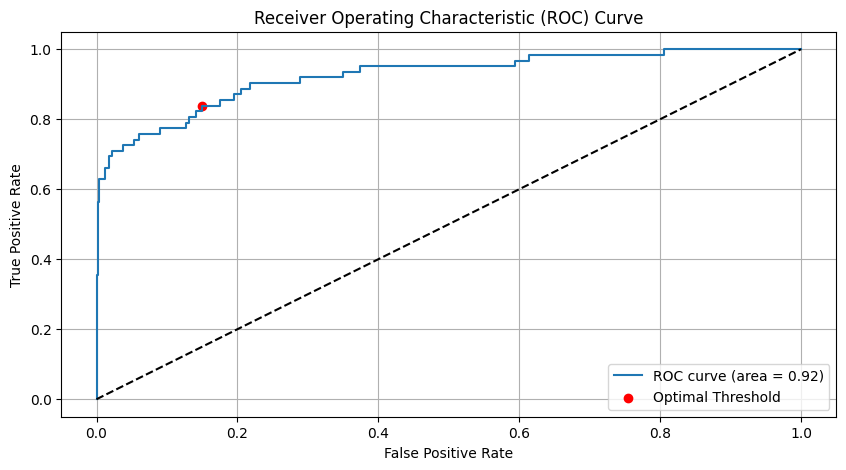

Model score: 0.8492176386913229
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92      1344
         1.0       0.20      0.82      0.32        62

    accuracy                           0.85      1406
   macro avg       0.60      0.84      0.62      1406
weighted avg       0.96      0.85      0.89      1406



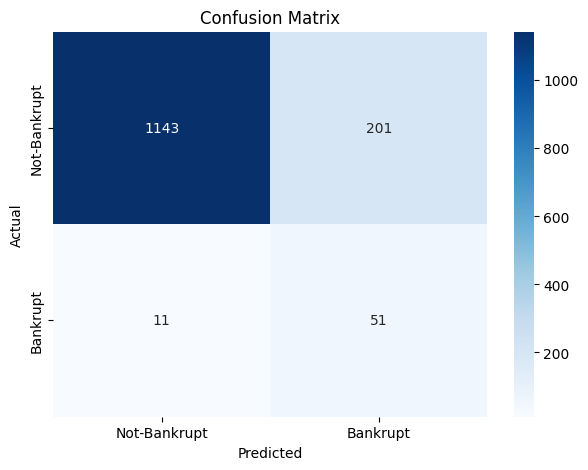

Early stopping was triggered after 13 rounds.


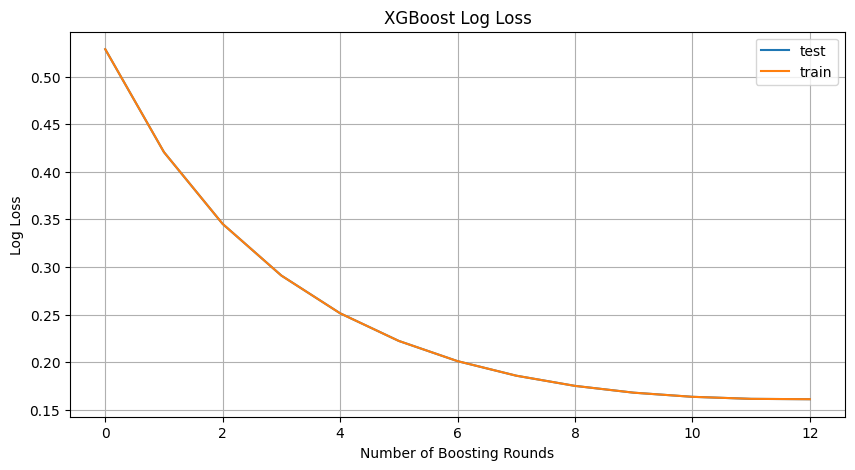

[0]	eval-logloss:0.53161	train-logloss:0.52868
[1]	eval-logloss:0.42595	train-logloss:0.42057
[2]	eval-logloss:0.35271	train-logloss:0.34516
[3]	eval-logloss:0.30047	train-logloss:0.29093
[4]	eval-logloss:0.26273	train-logloss:0.25133
[5]	eval-logloss:0.23544	train-logloss:0.22227
[6]	eval-logloss:0.21592	train-logloss:0.20106
[7]	eval-logloss:0.20229	train-logloss:0.18578
[8]	eval-logloss:0.19319	train-logloss:0.17508
[9]	eval-logloss:0.18762	train-logloss:0.16794
[10]	eval-logloss:0.18481	train-logloss:0.16360
[11]	eval-logloss:0.18419	train-logloss:0.16147
[12]	eval-logloss:0.18528	train-logloss:0.16109
[13]	eval-logloss:0.18774	train-logloss:0.16209
[14]	eval-logloss:0.19126	train-logloss:0.16417
[15]	eval-logloss:0.19561	train-logloss:0.16711
[16]	eval-logloss:0.20044	train-logloss:0.17047
[17]	eval-logloss:0.20574	train-logloss:0.17433
[18]	eval-logloss:0.21109	train-logloss:0.17813
[19]	eval-logloss:0.21640	train-logloss:0.18209
[20]	eval-logloss:0.21761	train-logloss:0.18283
[2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[33]	eval-logloss:0.23131	train-logloss:0.18664
[34]	eval-logloss:0.23069	train-logloss:0.18592
[35]	eval-logloss:0.23058	train-logloss:0.18522
[36]	eval-logloss:0.22918	train-logloss:0.18375
[37]	eval-logloss:0.22892	train-logloss:0.18167
[38]	eval-logloss:0.22892	train-logloss:0.18116
[39]	eval-logloss:0.22708	train-logloss:0.17906
[40]	eval-logloss:0.22360	train-logloss:0.17532
[41]	eval-logloss:0.22343	train-logloss:0.17401
[42]	eval-logloss:0.22204	train-logloss:0.17193
[43]	eval-logloss:0.22125	train-logloss:0.17008
[44]	eval-logloss:0.21871	train-logloss:0.16735
[45]	eval-logloss:0.21709	train-logloss:0.16548
[46]	eval-logloss:0.21512	train-logloss:0.16364
[47]	eval-logloss:0.21441	train-logloss:0.16212
[48]	eval-logloss:0.21345	train-logloss:0.16048
[49]	eval-logloss:0.21246	train-logloss:0.15950
[50]	eval-logloss:0.21159	train-logloss:0.15801
[51]	eval-logloss:0.21126	train-logloss:0.15695
[52]	eval-logloss:0.20919	train-logloss:0.15512
[53]	eval-logloss:0.20788	train-logloss:

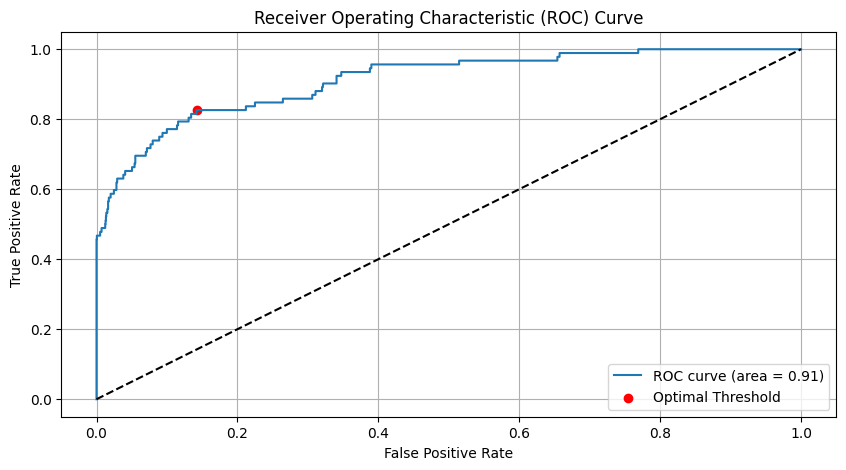

Model score: 0.856019656019656
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1943
         1.0       0.21      0.82      0.34        92

    accuracy                           0.86      2035
   macro avg       0.60      0.84      0.63      2035
weighted avg       0.95      0.86      0.89      2035



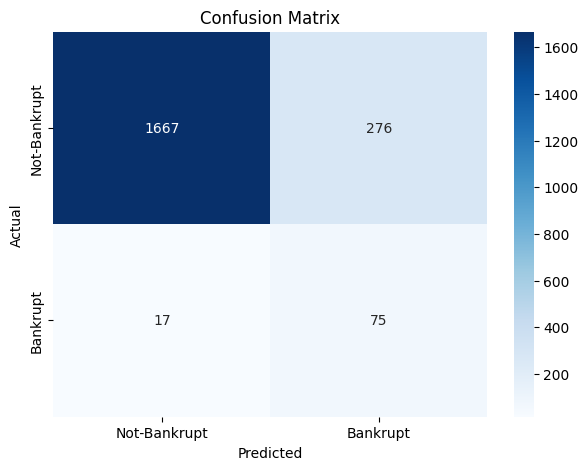

Early stopping was triggered after 8 rounds.


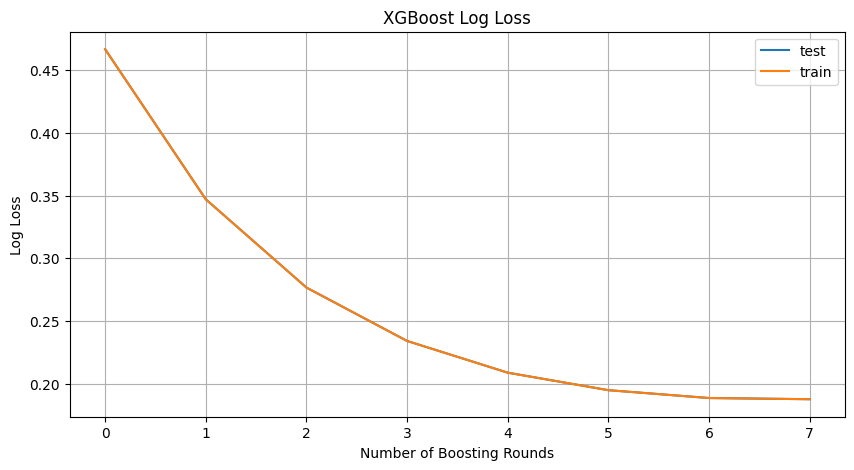

[0]	eval-logloss:0.46843	train-logloss:0.46630
[1]	eval-logloss:0.35072	train-logloss:0.34696
[2]	eval-logloss:0.28196	train-logloss:0.27677
[3]	eval-logloss:0.24080	train-logloss:0.23431
[4]	eval-logloss:0.21679	train-logloss:0.20908
[5]	eval-logloss:0.20404	train-logloss:0.19517
[6]	eval-logloss:0.19892	train-logloss:0.18893
[7]	eval-logloss:0.19906	train-logloss:0.18800
[8]	eval-logloss:0.20285	train-logloss:0.19073
[9]	eval-logloss:0.20816	train-logloss:0.19485
[10]	eval-logloss:0.20806	train-logloss:0.19490
[11]	eval-logloss:0.21242	train-logloss:0.19826
[12]	eval-logloss:0.21426	train-logloss:0.19986
[13]	eval-logloss:0.21910	train-logloss:0.20240
[14]	eval-logloss:0.22117	train-logloss:0.20396
[15]	eval-logloss:0.22355	train-logloss:0.20483
[16]	eval-logloss:0.22168	train-logloss:0.20240


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[17]	eval-logloss:0.22216	train-logloss:0.20233
[18]	eval-logloss:0.22347	train-logloss:0.20300
[19]	eval-logloss:0.22009	train-logloss:0.19910
[20]	eval-logloss:0.21917	train-logloss:0.19711
[21]	eval-logloss:0.21671	train-logloss:0.19413
[22]	eval-logloss:0.21631	train-logloss:0.19205
[23]	eval-logloss:0.21512	train-logloss:0.18950
[24]	eval-logloss:0.21420	train-logloss:0.18705
[25]	eval-logloss:0.21117	train-logloss:0.18272
[26]	eval-logloss:0.21089	train-logloss:0.18042
[27]	eval-logloss:0.20964	train-logloss:0.17775
[28]	eval-logloss:0.20887	train-logloss:0.17558
[29]	eval-logloss:0.20695	train-logloss:0.17216
[30]	eval-logloss:0.20602	train-logloss:0.16945
[31]	eval-logloss:0.20409	train-logloss:0.16712
[32]	eval-logloss:0.20391	train-logloss:0.16555
[33]	eval-logloss:0.20344	train-logloss:0.16296
[34]	eval-logloss:0.20147	train-logloss:0.15983
[35]	eval-logloss:0.20002	train-logloss:0.15717
[36]	eval-logloss:0.19908	train-logloss:0.15547
[37]	eval-logloss:0.19601	train-logloss:

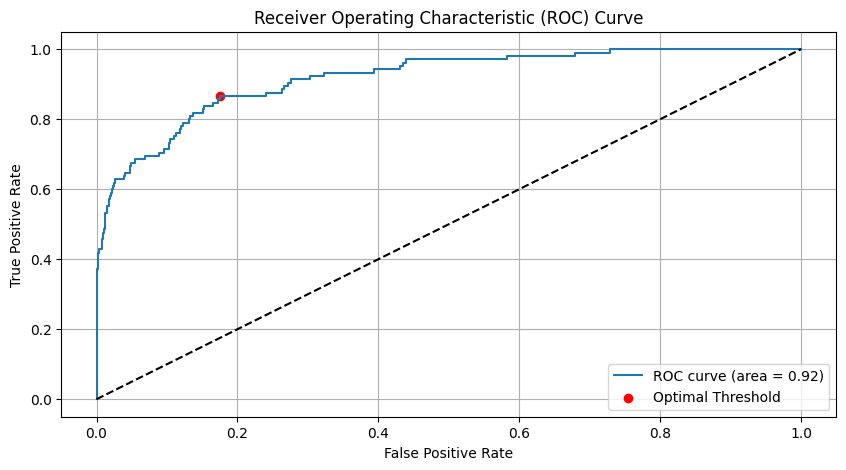

Model score: 0.8267491670633031
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      1996
         1.0       0.21      0.86      0.33       105

    accuracy                           0.83      2101
   macro avg       0.60      0.84      0.62      2101
weighted avg       0.95      0.83      0.87      2101



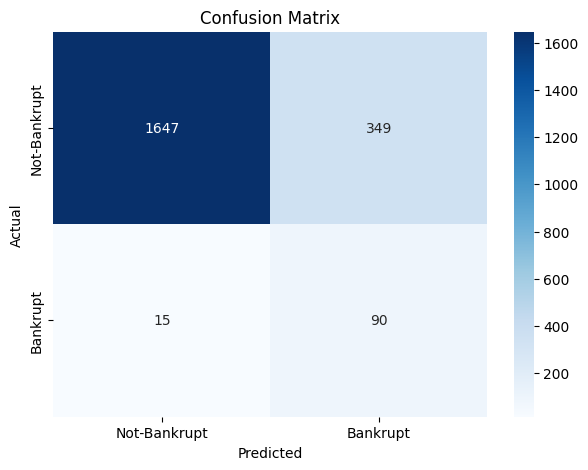

Early stopping was triggered after 6 rounds.


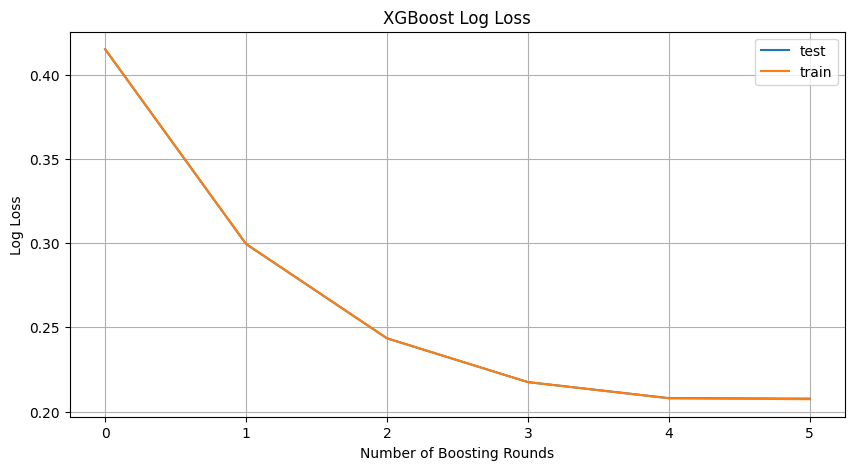

[0]	eval-logloss:0.41255	train-logloss:0.41510
[1]	eval-logloss:0.29511	train-logloss:0.29951
[2]	eval-logloss:0.23752	train-logloss:0.24350
[3]	eval-logloss:0.21007	train-logloss:0.21749
[4]	eval-logloss:0.19933	train-logloss:0.20784
[5]	eval-logloss:0.19707	train-logloss:0.20582
[6]	eval-logloss:0.20099	train-logloss:0.20972
[7]	eval-logloss:0.20760	train-logloss:0.21611
[8]	eval-logloss:0.21500	train-logloss:0.22314
[9]	eval-logloss:0.22243	train-logloss:0.22982
[10]	eval-logloss:0.22310	train-logloss:0.22823
[11]	eval-logloss:0.22627	train-logloss:0.22926
[12]	eval-logloss:0.22718	train-logloss:0.22719
[13]	eval-logloss:0.22729	train-logloss:0.22494
[14]	eval-logloss:0.22257	train-logloss:0.22165
[15]	eval-logloss:0.22253	train-logloss:0.22027
[16]	eval-logloss:0.21892	train-logloss:0.21445
[17]	eval-logloss:0.21614	train-logloss:0.21074
[18]	eval-logloss:0.21396	train-logloss:0.20786
[19]	eval-logloss:0.21219	train-logloss:0.20453
[20]	eval-logloss:0.20665	train-logloss:0.19868
[2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[24]	eval-logloss:0.19657	train-logloss:0.18171
[25]	eval-logloss:0.19640	train-logloss:0.17946
[26]	eval-logloss:0.19366	train-logloss:0.17678
[27]	eval-logloss:0.19032	train-logloss:0.17314
[28]	eval-logloss:0.18912	train-logloss:0.17032
[29]	eval-logloss:0.18659	train-logloss:0.16821
[30]	eval-logloss:0.18564	train-logloss:0.16627
[31]	eval-logloss:0.18521	train-logloss:0.16448
[32]	eval-logloss:0.18542	train-logloss:0.16303
[33]	eval-logloss:0.18549	train-logloss:0.16117
[34]	eval-logloss:0.18325	train-logloss:0.15859
[35]	eval-logloss:0.18217	train-logloss:0.15672
[36]	eval-logloss:0.18115	train-logloss:0.15504
[37]	eval-logloss:0.17997	train-logloss:0.15352
[38]	eval-logloss:0.17848	train-logloss:0.15162
[39]	eval-logloss:0.17656	train-logloss:0.14933
[40]	eval-logloss:0.17487	train-logloss:0.14767
[41]	eval-logloss:0.17264	train-logloss:0.14594
[42]	eval-logloss:0.17181	train-logloss:0.14447
[43]	eval-logloss:0.16943	train-logloss:0.14289
[44]	eval-logloss:0.16853	train-logloss:

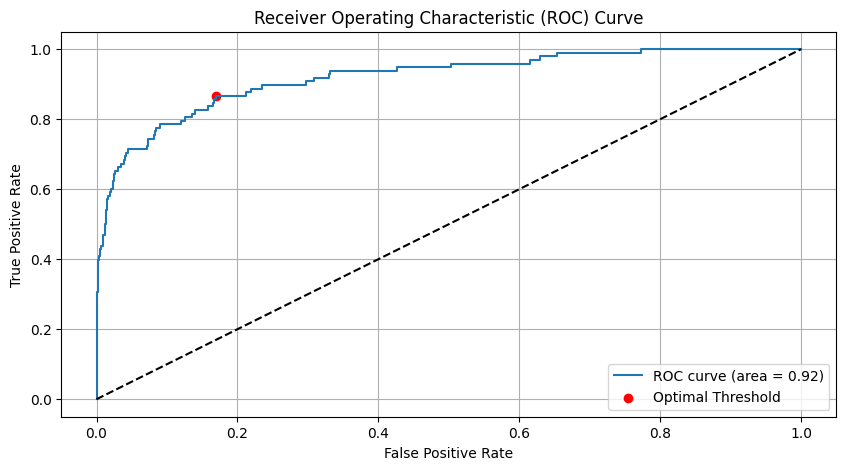

Model score: 0.8320571720265442
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      1861
         1.0       0.21      0.86      0.34        98

    accuracy                           0.83      1959
   macro avg       0.60      0.84      0.62      1959
weighted avg       0.95      0.83      0.88      1959



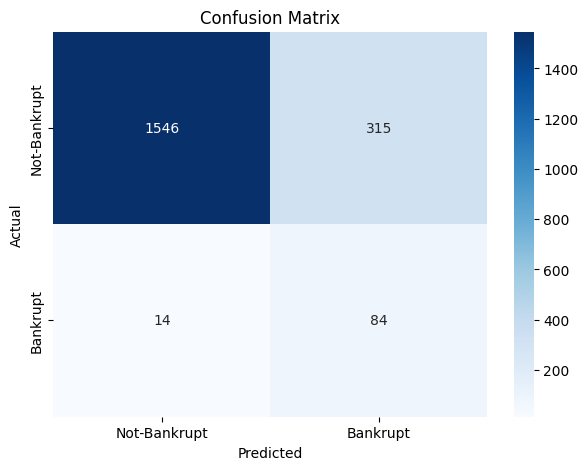

Early stopping was triggered after 13 rounds.


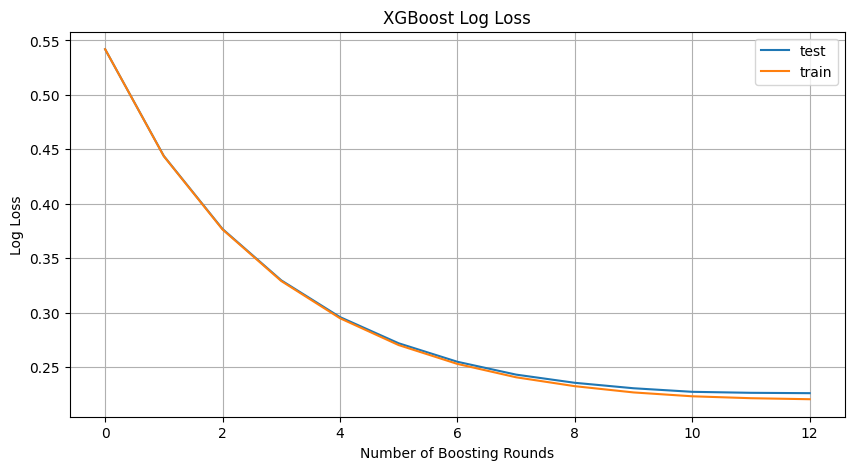

[0]	eval-logloss:0.54398	train-logloss:0.54189
[1]	eval-logloss:0.44797	train-logloss:0.44367
[2]	eval-logloss:0.38290	train-logloss:0.37668
[3]	eval-logloss:0.33654	train-logloss:0.32840
[4]	eval-logloss:0.30387	train-logloss:0.29353
[5]	eval-logloss:0.28145	train-logloss:0.26927
[6]	eval-logloss:0.26534	train-logloss:0.25127
[7]	eval-logloss:0.25496	train-logloss:0.23933
[8]	eval-logloss:0.24894	train-logloss:0.23111
[9]	eval-logloss:0.24526	train-logloss:0.22555
[10]	eval-logloss:0.24225	train-logloss:0.22153
[11]	eval-logloss:0.24094	train-logloss:0.21935
[12]	eval-logloss:0.24167	train-logloss:0.21945
[13]	eval-logloss:0.24263	train-logloss:0.21920
[14]	eval-logloss:0.24346	train-logloss:0.21981
[15]	eval-logloss:0.24383	train-logloss:0.21992
[16]	eval-logloss:0.24607	train-logloss:0.22106
[17]	eval-logloss:0.24706	train-logloss:0.22182
[18]	eval-logloss:0.24936	train-logloss:0.22231
[19]	eval-logloss:0.25157	train-logloss:0.22350
[20]	eval-logloss:0.25412	train-logloss:0.22544
[2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[29]	eval-logloss:0.25737	train-logloss:0.22081
[30]	eval-logloss:0.25897	train-logloss:0.22091
[31]	eval-logloss:0.25980	train-logloss:0.22022
[32]	eval-logloss:0.26021	train-logloss:0.21964
[33]	eval-logloss:0.25863	train-logloss:0.21813
[34]	eval-logloss:0.25628	train-logloss:0.21662
[35]	eval-logloss:0.25572	train-logloss:0.21527
[36]	eval-logloss:0.25576	train-logloss:0.21471
[37]	eval-logloss:0.25603	train-logloss:0.21398
[38]	eval-logloss:0.25541	train-logloss:0.21327
[39]	eval-logloss:0.25438	train-logloss:0.21258
[40]	eval-logloss:0.25051	train-logloss:0.20953
[41]	eval-logloss:0.24874	train-logloss:0.20731
[42]	eval-logloss:0.24802	train-logloss:0.20610
[43]	eval-logloss:0.24652	train-logloss:0.20474
[44]	eval-logloss:0.24515	train-logloss:0.20356
[45]	eval-logloss:0.24460	train-logloss:0.20206
[46]	eval-logloss:0.24391	train-logloss:0.20079
[47]	eval-logloss:0.24300	train-logloss:0.20011
[48]	eval-logloss:0.24190	train-logloss:0.19911
[49]	eval-logloss:0.24182	train-logloss:

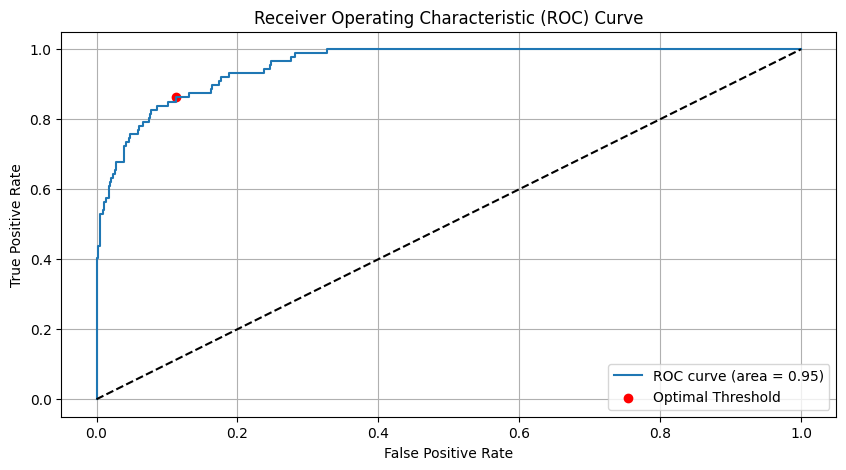

Model score: 0.8840947546531303
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.93      1095
         1.0       0.37      0.85      0.52        87

    accuracy                           0.88      1182
   macro avg       0.68      0.87      0.73      1182
weighted avg       0.94      0.88      0.90      1182



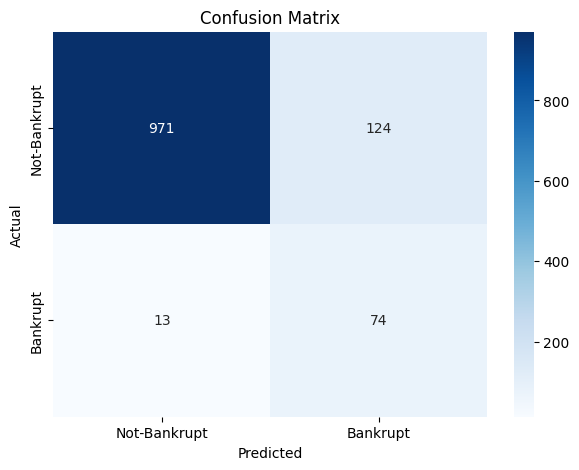

In [31]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

def train_many_xgb(datalist, param):
    X_train, X_test, y_train, y_test = train_test_split(
        datalist.drop(columns='class'), datalist['class'],
        test_size=.2, random_state=12
    )

    # Convert the data to DMatrix format
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    evallist = [(dtest, 'eval'), (dtrain, 'train')]
    num_round = 500  # number of boosting rounds

    # Cross validation
    cv_results = xgb.cv(
        params=param,
        dtrain=dtrain,
        num_boost_round=num_round,
        nfold=5,
        verbose_eval=False,
        early_stopping_rounds=10
    )

    # Check if early stopping was triggered
    if cv_results.shape[0] < num_round:
        print(f"Early stopping was triggered after {cv_results.shape[0]} rounds.")
    else:
        print("Model trained for the full specified rounds without triggering early stopping.")

    # Plotting the log loss from CV results
    plt.figure(figsize=(10, 5))
    plt.plot(cv_results['test-logloss-mean'], label='test')
    plt.plot(cv_results['train-logloss-mean'], label='train')
    plt.xlabel('Number of Boosting Rounds')
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    bst = xgb.train(param, dtrain, num_round, evallist)

    # Predict probabilities
    pred_probs = bst.predict(dtest)

    # Compute ROC curve metrics
    fpr, tpr, thresholds = roc_curve(y_test, pred_probs)
    roc_auc = auc(fpr, tpr)

    # Find the optimal threshold
    optimal_idx = np.argmin(np.sqrt(np.square(1-tpr) + np.square(fpr)))
    optimal_threshold = thresholds[optimal_idx]
    print(f"Optimal threshold: {optimal_threshold}")

    # Plotting the ROC curve
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label='Optimal Threshold')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Convert probabilities to binary outputs using the optimal threshold
    preds = (pred_probs > optimal_threshold).astype(int)

    # Display model score
    score = accuracy_score(preds, y_test)
    print(f"Model score: {score}")

    # Display classification report
    print(classification_report(y_test, preds))

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not-Bankrupt', 'Bankrupt'], yticklabels=['Not-Bankrupt', 'Bankrupt'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    return bst

params_list = [
    #Model 1
    {'eta': 0.3,
    'gamma': 0.001385478312840971,
    'max_depth': 4,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'scale_pos_weight': 0.038617886178861784},
    # Model 2
    {'eta': 0.2,
    'gamma': 0.05012910226369505,
    'max_depth': 5,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'scale_pos_weight': 0.039335887611749686},
    # Model 3
    {'eta': 0.3,
    'gamma': 0.11957956215321741,
    'max_depth': 9,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'scale_pos_weight': 0.04867698452321517},
    # Model 4
    {'eta': 0.4,
    'gamma': 0.017476684937741738,
    'max_depth': 11,
    'min_child_weight': 2,
    'objective': 'binary:logistic',
    'scale_pos_weight': 0.05622977346278318},
    # Model 5
    {'eta': 0.2,
    'gamma': 0.033204375734381286,
    'max_depth': 3,
    'min_child_weight': 2,
    'objective': 'binary:logistic',
    'scale_pos_weight': 0.07332576617480137}
]

models = [train_many_xgb(df, param) for df, param in zip(median_imputed_dfs, params_list)]
